# **Graduation Project -- IndiGo Airline Analysis**

# **Business Problem Overview**

**IndiGo Airlines: Maximising On-Time Arrival Rate (OTAR) through Operational Efficiency**

IndiGo Airlines, a leading Indian low-cost carrier, has recently entered the U.S. domestic aviation market with a vision to replicate its high-efficiency, customer-first operations in a new and complex environment. Operating across a network of busy U.S. hubs, weather-sensitive regions, and constrained air traffic zones, IndiGo now faces operational challenges unfamiliar to its existing markets—including cascading flight delays, unpredictable seasonal disruptions, and systemic inefficiencies.

###  **Problem Objective**
The goal of the Project is to provide suggestions to IndiGo Airline that  help the airline maximize OTAR across its new U.S. network.The analysis will focus on:

  - Decomposing OTAR into departure delay, taxi‑out, en‑route, taxi‑in and turnaround components.
  - Explore temporal (time‑of‑day, day‑of‑week, season) and network (hubs, rotations, route structures) patterns.
  - Formulating and validating hypotheses around key delay drivers.
  - Uncovering unexpected insights that could yield a competitive advantage.

# **Dataset Overview**

*   **Dataset Name**: IndiGo Flight DataSet
*   **Number of Rows:** 5819079
*  **Number of Columns:** 31


## **Column Definitions**

1. **YEAR**: The calendar year in which the flight trip took place
2. **MONTH**: The calendar month of the flight
3. **DAY**: The day of the month on which the flight took place.
4. **DAY_OF_WEEK**: The day of the week the flight was scheduled (1 = Monday, 7 = Sunday)
5. **AIRLINE**: Code representing the airline operating the flight.
6. **FLIGHT_NUMBER**: The flight number used to identify a specific trip.
7. **TAIL_NUMBER**:  The unique aircraft identifier or registration number.
8. **ORIGIN_AIRPORT**: The code of the airport where the flight originated.
9. **DESTINATION_AIRPORT**: The code of the airport where the flight landed.
10. **SCHEDULED_DEPARTURE**: The planned departure time of the flight.
11. **DEPARTURE_TIME**: The actual departure time, calculated as WHEELS_OFF - TAXI_OUT
12. **DEPARTURE_DELAY**: The total delay in minutes beyond the scheduled departure time
13. **TAXI_OUT**:The time in minutes between leaving the gate and taking off.
14. **WHEELS_OFF**: The time the aircraft actually left the ground.
15. **SCHEDULED_TIME**:  The planned total duration of the flight in minutes.
16. **ELAPSED_TIME**: The total time in minutes from gate departure to gate arrival
17. **AIR_TIME**: The time between takeoff and landing
18. **DISTANCE**: The distance between the origin and destination airports in miles.
19. **WHEELS_ON**: The time the aircraft's wheels touched the ground at the destination.
20. **TAXI_IN**: Time taken to reach the gate after landing
21. **SCHEDULED_ARRIVAL**: The planned arrival time of the flight.
22. **ARRIVAL_TIME**:  The actual arrival time at the gate.
23. **ARRIVAL_DELAY**:  Difference between scheduled and actual arrival times in minutes
24. **DIVERTED**: Indicates if the flight was diverted to another airport.
25. **CANCELLED**: Indicates whether the flight was canceled
26. **CANCELLATION_REASON**: The reason why the flight was canceled.
27. **AIR_SYSTEM_DELAY**: Delay caused by the air traffic control system.
28. **SECURITY_DELAY**: Delay caused due to security checks or concerns.
29. **AIRLINE_DELAY**: Delay due to airline operations
30. **LATE_AIRCRAFT_DELAY**: Delay because the aircraft arrived late from a previous flight
31. **WEATHER_DELAY**: Delay caused by adverse weather conditions.

#**Analysis & Visualization**

##***I. Data Importing,Cleaning and Identifying Outliers***

###**1.Importing Necessary Libraries**

In [1]:
#For data manipulation and analysis
import pandas as pd
#For numerical computations
import numpy as np
#For data visualization
import matplotlib.pyplot as plt
#For advanced data  visualization
import seaborn as sns
# For dattime conversion
import datetime as dt

###**2.Loading the dataset from Google Drive**

In [2]:
# Step 1: Install gdown
!pip install gdown

# Step 2: Import below libraries
import gdown

# Step 3: Set the file ID and create a download URL
file_id = "1EVaaJi4SqJ6V1U_KA_d1xEU-SOnUEV_3"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Step 4: Set the output file name
output_file = "flights_dataset.csv"

# Step 5: Download the file
gdown.download(download_url, output_file, quiet=False)

# Step 6: Load the CSV file into a Pandas DataFrame (change name according to your choice)
indigo_data = pd.read_csv(output_file)

Downloading...
From (original): https://drive.google.com/uc?id=1EVaaJi4SqJ6V1U_KA_d1xEU-SOnUEV_3
From (redirected): https://drive.google.com/uc?id=1EVaaJi4SqJ6V1U_KA_d1xEU-SOnUEV_3&confirm=t&uuid=32aaeb7f-d82c-4608-bd47-d7b363e764d2
To: /content/flights_dataset.csv
100%|██████████| 592M/592M [00:10<00:00, 56.7MB/s]
<ipython-input-2-8bf1cd2c366d>:18: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  indigo_data = pd.read_csv(output_file)


###**3. Dataset - Sample View**

In [3]:
indigo_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [4]:
#Displaying the sample of  imported Data
print("\033[1mDataset - Sample ") #\033[1m is used to print a bold header for clarity
display(indigo_data.head())

Dataset - Sample 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


###**4. Displaying the shape of the dataset**

In [5]:
print("\033[1m The Number of Rows and Columns in the dataset are: ")  # \033[1m is used to print a bold header for clarity
indigo_data.shape

 The Number of Rows and Columns in the dataset are: 


(5819079, 31)

###**5. Displaying dataset information**

In [6]:
print("\nDataset Information")
indigo_data.info()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED   

###**6. Checking for Duplicate Values in the Dataset**

In [7]:
#counting the Number of duplicate Rows
duplicate_count = indigo_data.duplicated().sum()
print(f"\033[1mNumber of duplicate rows in the dataset are:")
duplicate_count

Number of duplicate rows in the dataset are:


np.int64(0)

###**7. Displaying the data summary statistics.**

In [8]:
# Checking summary statistics of the dataset using describe() function.

print("\033[1mSummary Statistics of the Dataset")
indigo_data.describe()

Summary Statistics of the Dataset


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


###**8. Identifying and Handling Missing/Null  values in the dataset**

In [9]:
# Identifying distribution of missing values and their percentages
def data_missing_values_percentage(df):
    missing_data  = df.isnull().sum().sort_values(ascending=False)
    # Removing Columns where Missing Values are 0
    total_missing = missing_data[missing_data > 0]
    percent_missing = ((total_missing / df.shape[0]) * 100).round(2) # Round to 2 decimal place
    total_values = df.shape[0]  # Total rows in the dataframe

    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent (%)'])
    missing_data['Total Values'] = total_values  # Add total values for each column
    return missing_data

data_missing_values_percentage(indigo_data)

,Total Missing,Percent (%),Total Values
CANCELLATION_REASON,5729195,98.46,5819079
LATE_AIRCRAFT_DELAY,4755640,81.72,5819079
WEATHER_DELAY,4755640,81.72,5819079
AIRLINE_DELAY,4755640,81.72,5819079
AIR_SYSTEM_DELAY,4755640,81.72,5819079
SECURITY_DELAY,4755640,81.72,5819079
ELAPSED_TIME,105071,1.81,5819079
AIR_TIME,105071,1.81,5819079
ARRIVAL_DELAY,105071,1.81,5819079
WHEELS_ON,92513,1.59,5819079


**Hanlding Missing Values in the dataset**

- `CANCELLATION_REASON`: Impututing NAN values with category E as Unknown

- `LATE_AIRCRAFT_DELAY`, `WEATHER_DELAY`,
   `AIRLINE_DELAY`,`AIR_SYSTEM_DELAY`,
   `SECURITY_DELAY`- Impututing NAN values for these columns with 0 assuming there might no delay

- Leaving NaNs as-is in `ARRIVAL_DELAY`, `ARRIVAL_TIME`, `DEPARTURE_TIME`, `DEPAURTE_DELAY`,`WHEELS_ON`, `WHEELS_OFF`, `TAXI_IN`, `TAXI_OUT`, and `AIR_TIME` ensures cancellations and diversions are correctly treated as not on-time
-  `TAIL_NUMBER`,`SCHEDULED_TIME`- dropping these columns NAN values are very low and negligble


In [10]:
indigo_data['CANCELLATION_REASON'].fillna('E', inplace=True)

delay_columns = ['LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY']
for column in delay_columns:
    indigo_data[column].fillna(0, inplace=True)


indigo_data.dropna(subset=['TAIL_NUMBER'], inplace=True)
indigo_data.dropna(subset=['SCHEDULED_TIME'], inplace=True)


<ipython-input-10-708b9591ad5b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  indigo_data['CANCELLATION_REASON'].fillna('E', inplace=True)
<ipython-input-10-708b9591ad5b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

###**9.Correcting Datatypes**

In [11]:
#Displaying the data types of each column in the dataset
indigo_data.dtypes

,0
YEAR,int64
MONTH,int64
DAY,int64
DAY_OF_WEEK,int64
AIRLINE,object
FLIGHT_NUMBER,int64
TAIL_NUMBER,object
ORIGIN_AIRPORT,object
DESTINATION_AIRPORT,object
SCHEDULED_DEPARTURE,int64


#### **Correcting Datatypes**

- Convert DIVERTED column from int64 to bool (0/1 to True/False).

- Convert CANCELLED column from int64 to bool (0/1 to True/False).

- Convert FLIGHT_NUMBER column from int64 to str (e.g., 558 → '558').

- Format SCHEDULED_ARRIVAL column:Pad integer times to 4 digits (e.g., 930 → '0930') Convert into time format (HH:MM).

- Format WHEELS_OFF column (only for non-null entries): Pad to 4 digits and convert into time format (HH:MM).

- Format ARRIVAL_TIME column (only for non-null entries):Pad to 4 digits and convert into time format (HH:MM).

- Format SCHEDULED_DEPARTURE column:Pad to 4 digits and format as string in HH:MM format.

- Format DEPARTURE_TIME column (only for non-null entries):Pad to 4 digits and convert into time format (HH:MM).


In [12]:
indigo_data['WHEELS_ON'].isna().sum()

np.int64(77786)

In [13]:

# Flags → bool
indigo_data['DIVERTED'] = indigo_data['DIVERTED'].astype(bool)
indigo_data['CANCELLED'] = indigo_data['CANCELLED'].astype(bool)

#convert flight number to str
indigo_data['FLIGHT_NUMBER'] = indigo_data['FLIGHT_NUMBER'].astype(str)


indigo_data['SCHEDULED_ARRIVAL'] = pd.to_datetime(
    indigo_data['SCHEDULED_ARRIVAL'].astype(str).str.zfill(4),  # Ensure 4-digit strings like '0430'
    format='%H%M',  # Parse as hour and minute
    errors='coerce'  # Invalid formats become NaT
).dt.time  # Extract time only

mask = indigo_data['WHEELS_OFF'].notna()

indigo_data.loc[mask, 'WHEELS_OFF'] = pd.to_datetime(
    indigo_data.loc[mask, 'WHEELS_OFF'].astype(int).astype(str).str.zfill(4),
    format='%H%M',
    errors='coerce'
).dt.time


arrival_time_mask = indigo_data['ARRIVAL_TIME'].notna()

indigo_data.loc[arrival_time_mask, 'ARRIVAL_TIME'] = pd.to_datetime(
    indigo_data.loc[arrival_time_mask, 'ARRIVAL_TIME'].astype(int).astype(str).str.zfill(4),
    format='%H%M',
    errors='coerce'
).dt.time


 #Convert integer to string, pad with zeros to ensure 4 digits (e.g., 559 -> 0559)
indigo_data['SCHEDULED_DEPARTURE'] = indigo_data['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4)

# Convert to time format using pd.to_datetime and extract time component
indigo_data['SCHEDULED_DEPARTURE'] = pd.to_datetime(indigo_data['SCHEDULED_DEPARTURE'], format='%H%M').dt.strftime('%H:%M')

depature_time_mask = indigo_data['DEPARTURE_TIME'].notna()

indigo_data.loc[depature_time_mask, 'DEPARTURE_TIME'] = pd.to_datetime(
    indigo_data.loc[depature_time_mask, 'DEPARTURE_TIME'].astype(int).astype(str).str.zfill(4),
    format='%H%M',
    errors='coerce'
).dt.time

<ipython-input-13-81510bec39e5>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[datetime.time(0, 15) datetime.time(0, 14) datetime.time(0, 34) ...
 datetime.time(0, 7) datetime.time(0, 3) datetime.time(0, 28)]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  indigo_data.loc[mask, 'WHEELS_OFF'] = pd.to_datetime(
<ipython-input-13-81510bec39e5>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[datetime.time(4, 8) datetime.time(7, 41) datetime.time(8, 11) ...
 datetime.time(4, 32) datetime.time(3, 30) datetime.time(4, 42)]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  indigo_data.loc[arrival_time_mask, 'ARRIVAL_TIME'] = pd.to_datetime(
<ipython-input-13-81510bec39e5>:41: FutureWarning: Setting an item of incompatible dtype is deprecat

In [14]:
# Convert scheduled time from minutes to 'HH:MM' format using vectorized floor division and zero-padded remainder
indigo_data['SCHEDULED_TIME'] = (indigo_data['SCHEDULED_TIME'] // 60).astype(int).astype(str) + ':' + (indigo_data['SCHEDULED_TIME'] % 60).astype(int).astype(str).str.zfill(2)

In [15]:

wheels_on_mask = indigo_data['WHEELS_ON'].notna()

indigo_data.loc[wheels_on_mask, 'WHEELS_ON'] = pd.to_datetime(
    indigo_data.loc[wheels_on_mask, 'WHEELS_ON'].astype(int).astype(str).str.zfill(4),
    format='%H%M',
    errors='coerce'
).dt.time

<ipython-input-15-387f7ebeb1e0>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[datetime.time(4, 4) datetime.time(7, 37) datetime.time(8, 0) ...
 datetime.time(4, 24) datetime.time(3, 27) datetime.time(4, 37)]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  indigo_data.loc[wheels_on_mask, 'WHEELS_ON'] = pd.to_datetime(


In [16]:
indigo_data.dtypes

,0
YEAR,int64
MONTH,int64
DAY,int64
DAY_OF_WEEK,int64
AIRLINE,object
FLIGHT_NUMBER,object
TAIL_NUMBER,object
ORIGIN_AIRPORT,object
DESTINATION_AIRPORT,object
SCHEDULED_DEPARTURE,object


### **10**.**Outliers**

####*a.Checking Outliers for all Numeric columns*

In [17]:
# Selecting only numeric columns
numeric_data = indigo_data.select_dtypes(include=['number'])

# Compute IQR for numerical columns
Q1 = numeric_data.quantile(0.25)  # 25th percentile
Q3 = numeric_data.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).sum()

# Print outliers for each column
print("Outliers detected per column:")
print(outliers)

Outliers detected per column:
YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
DEPARTURE_DELAY        736240
TAXI_OUT               282602
ELAPSED_TIME           291084
AIR_TIME               296342
DISTANCE               348071
TAXI_IN                282538
ARRIVAL_DELAY          512002
AIR_SYSTEM_DELAY       564826
SECURITY_DELAY           3484
AIRLINE_DELAY          570022
LATE_AIRCRAFT_DELAY    556953
WEATHER_DELAY           64716
dtype: int64


####b. **Plotting outliers using boxplot to identify extreme values**

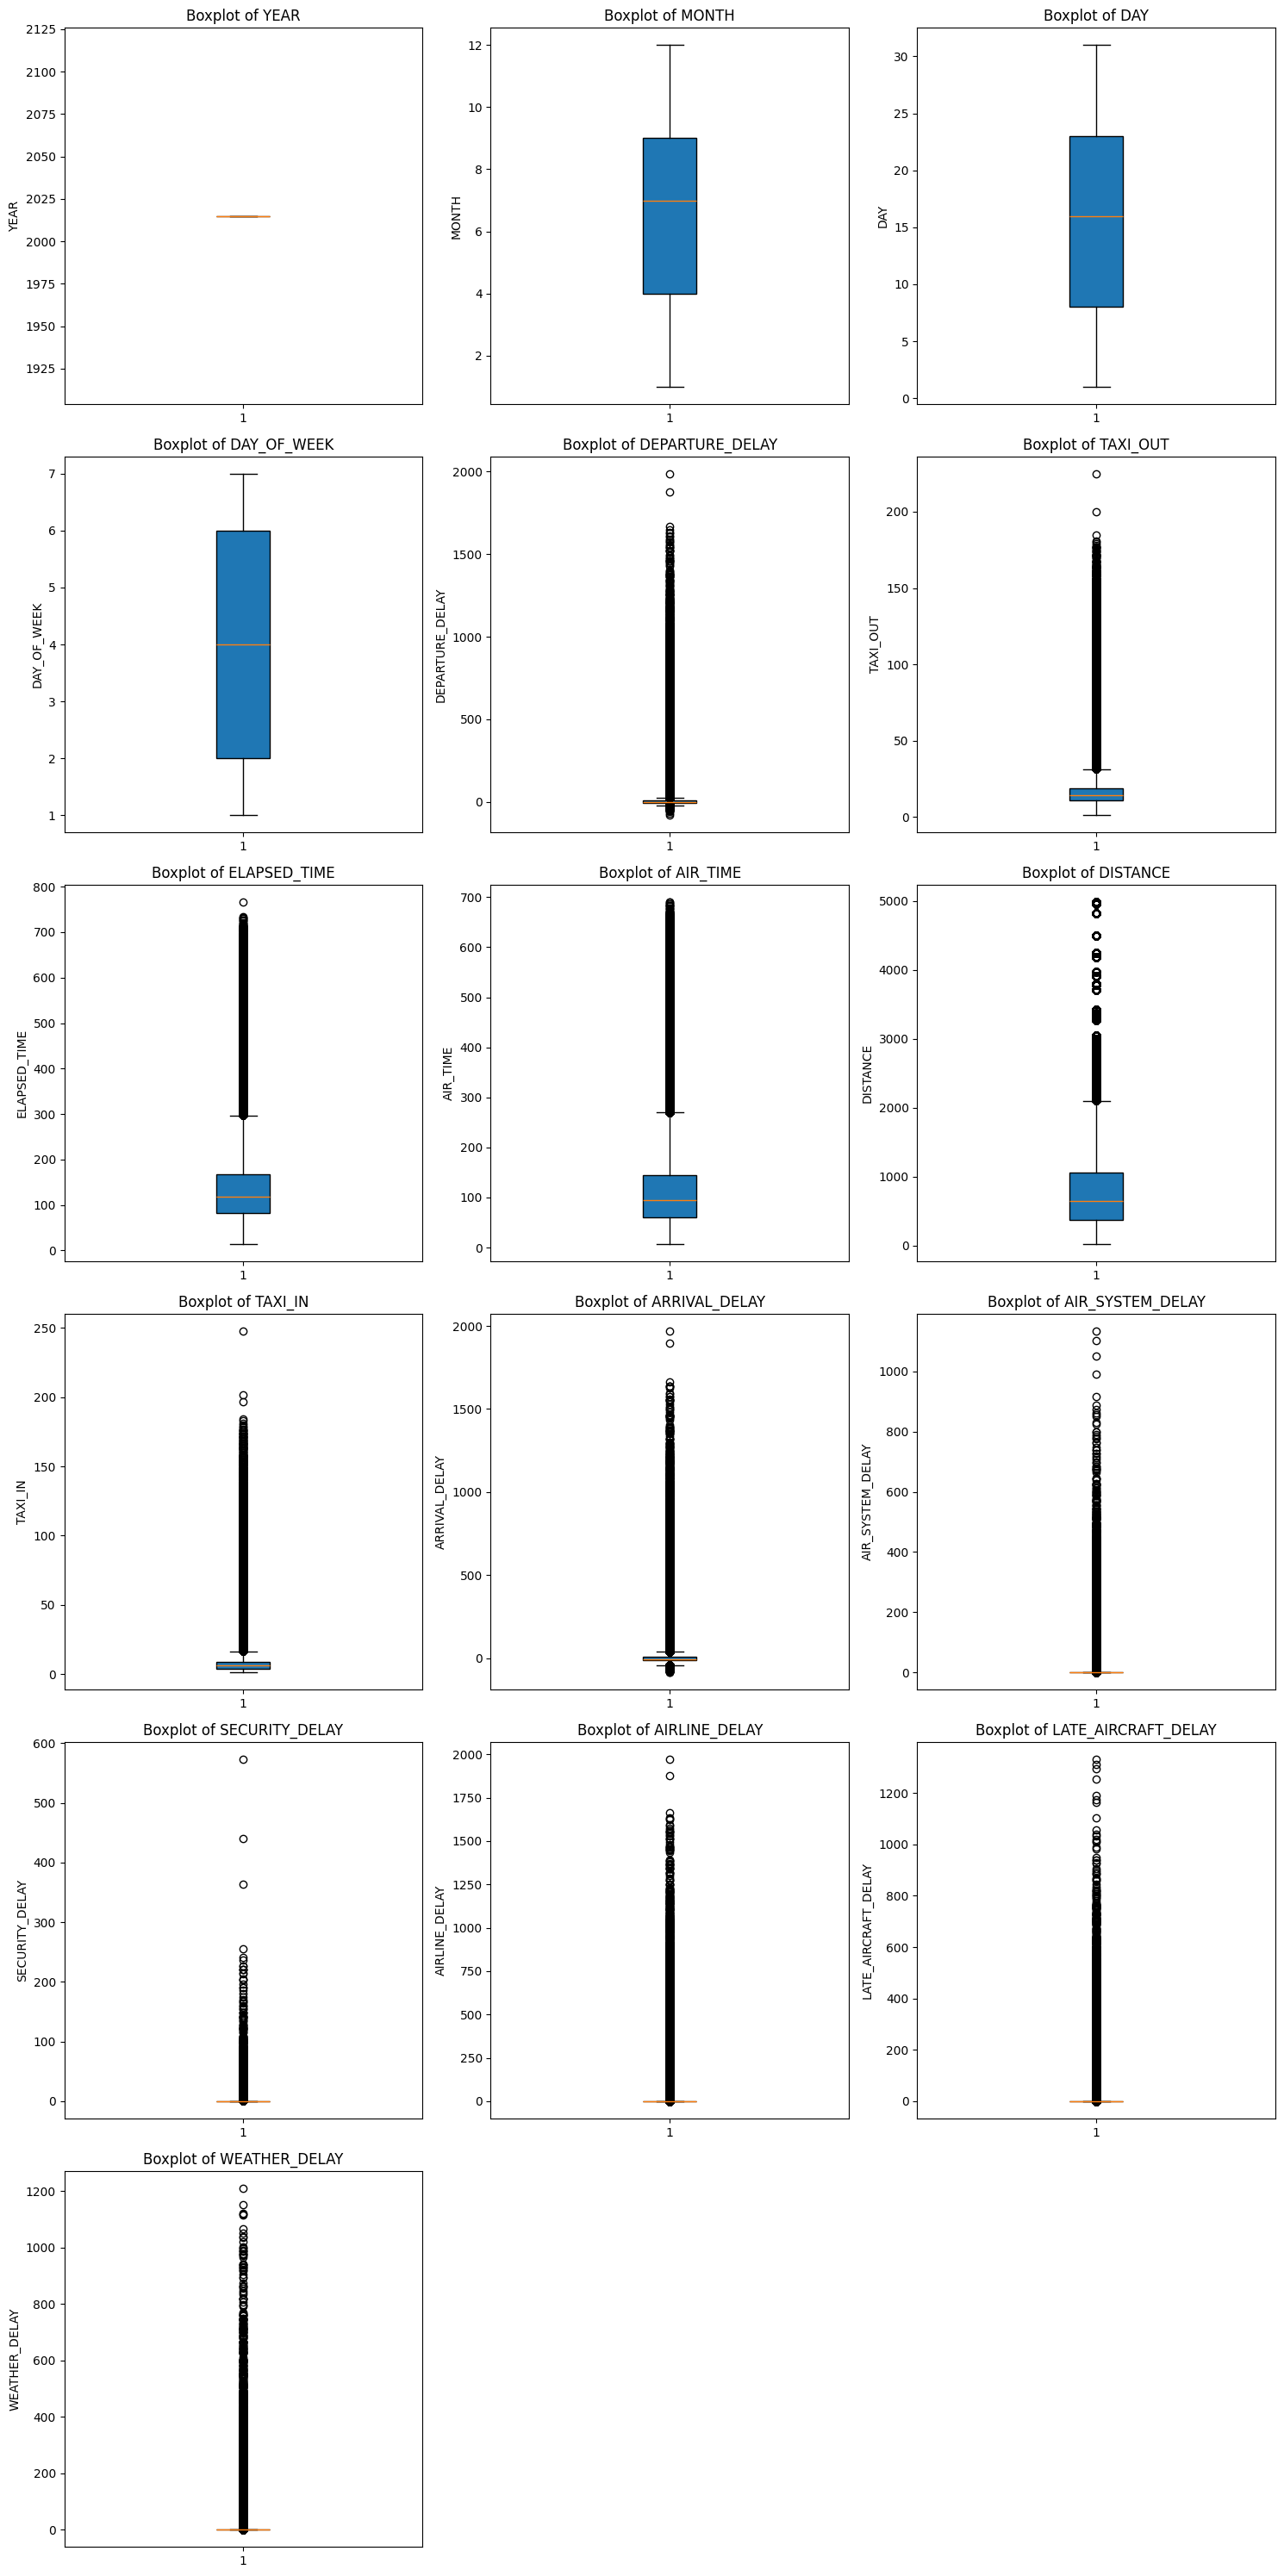

In [18]:
numeric_columns = indigo_data.select_dtypes(include=['number']).columns

#Define subplot layout
num_cols = 3  # Number of columns in the subplot grid
num_rows = -(-len(numeric_columns) // num_cols)  # Ceiling division to get rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create boxplots for each numeric column
for i, col in enumerate(numeric_columns):
    axes[i].boxplot(indigo_data[col].dropna(), patch_artist=True)  # Drop NaN values
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


####C.**Handling Outliers for all Numeric columns**

In [19]:
#defining a common function to finding number of outliers using IQR(Interquartile Range) stratergy
def find_outliers_IQR(df):

   #25 percent quantile
   q1=df.quantile(0.25)

   #75 percent quantile
   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

##### 1.`DEPATURE_DELAY`

In [20]:
# finding number of outliers , max and min outlier value for deapture delay column

outliers = find_outliers_IQR(indigo_data['DEPARTURE_DELAY'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:736240
max outlier value: 1988.0
min outlier value: -82.0


In [21]:
# Define thresholds
lower_bound = -13  # 1st percentile
upper_bound = 120  # ~2 hours

# Clip outliers
indigo_data['DEPARTURE_DELAY'] = indigo_data['DEPARTURE_DELAY'].clip(lower=lower_bound, upper=upper_bound)

##### 2.`TAXI_OUT`

In [22]:
# finding number of outliers , max and min outlier value for taxi out column

outliers = find_outliers_IQR(indigo_data['TAXI_OUT'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:282602
max outlier value: 225.0
min outlier value: 32.0


In [23]:
taxi_out_99th_percentile = indigo_data['TAXI_OUT'].quantile(0.99)

# Clip outliers
indigo_data['TAXI_OUT'] = indigo_data['TAXI_OUT'].clip(upper=taxi_out_99th_percentile)


##### 3.`ELAPSED TIME`

In [24]:
# finding number of outliers , max and min outlier value for elapsed time column

outliers = find_outliers_IQR(indigo_data['ELAPSED_TIME'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:291084
max outlier value: 766.0
min outlier value: 298.0


In [25]:
greater_than_700 = indigo_data.loc [indigo_data['ELAPSED_TIME'] > 700]

print(f"Number of rows with ELAPSED_TIME greater than 700: {len(greater_than_700)}")

Number of rows with ELAPSED_TIME greater than 700: 43


In [26]:
print(f"99th percentile value: {indigo_data['ELAPSED_TIME'].quantile(0.99)}")

99th percentile value: 367.0


#####4.`AIR_TIME`

In [27]:
# finding number of outliers , max and min outlier value for air time column

outliers = find_outliers_IQR(indigo_data['AIR_TIME'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:296342
max outlier value: 690.0
min outlier value: 271.0


In [28]:
greater_than_600 = indigo_data.loc [indigo_data['AIR_TIME'] >= 600]

print(f"Number of rows with AIR_TIME greater than 600: {len(greater_than_600)}")

Number of rows with AIR_TIME greater than 600: 632


In [29]:
print(f"99th percentile value: {indigo_data['AIR_TIME'].quantile(0.99)}")

99th percentile value: 337.0


#####5. `DISTANCE`

In [30]:
# finding number of outliers , max and min outlier value for distance column

outliers = find_outliers_IQR(indigo_data['DISTANCE'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:348071
max outlier value: 4983
min outlier value: 2105


#####6.`TAXI_IN`

In [31]:
# finding number of outliers , max and min outlier value for TAXI_IN column

outliers = find_outliers_IQR(indigo_data['TAXI_IN'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:282538
max outlier value: 248.0
min outlier value: 17.0


In [32]:
print(f"99th percentile of taxi_in colum : {indigo_data['TAXI_IN'].quantile(0.99)}")

99th percentile of taxi_in colum : 30.0


In [33]:
taxi_in_99th_percentile = indigo_data['TAXI_IN'].quantile(0.99)

# Clip outliers
indigo_data['TAXI_IN'] = indigo_data['TAXI_IN'].clip(upper=taxi_in_99th_percentile)

#####7.`ARRIVAL_DELAY`

In [34]:
# finding number of outliers , max and min outlier value for arrival delay column

outliers = find_outliers_IQR(indigo_data['ARRIVAL_DELAY'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:512002
max outlier value: 1971.0
min outlier value: -87.0


In [35]:
print(f"99th percentile of arrival delay colum : {indigo_data['ARRIVAL_DELAY'].quantile(0.99)}")

99th percentile of arrival delay colum : 167.0


In [36]:
print(f"95th percentile of arrival delay colum : {indigo_data['ARRIVAL_DELAY'].quantile(0.95)}")

95th percentile of arrival delay colum : 66.0


In [37]:
print(f"1th percentile of arrival delay colum : {indigo_data['ARRIVAL_DELAY'].quantile(0.01)}")

1th percentile of arrival delay colum : -34.0


In [38]:
greater_than_1000 = indigo_data.loc [indigo_data['ARRIVAL_DELAY'] >= 1000]

print(f"Number of rows with ARRIVAL_DELAY greater than 1000: {len(greater_than_1000)}")

Number of rows with ARRIVAL_DELAY greater than 1000: 267


In [39]:
arrival_delay_1th_percentile = indigo_data['ARRIVAL_DELAY'].quantile(0.01)
arrival_delay_99th_percentile = indigo_data['ARRIVAL_DELAY'].quantile(0.99)



# Clip outliers
indigo_data['ARRIVAL_DELAY'] = indigo_data['ARRIVAL_DELAY'].clip(lower=arrival_delay_1th_percentile, upper=arrival_delay_99th_percentile)


#####8. `AIR_SYSTEM_DELAY`

In [40]:
# finding number of outliers , max and min outlier value for air system delay column

outliers = find_outliers_IQR(indigo_data['AIR_SYSTEM_DELAY'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")


number of outliers:564826
max outlier value: 1134.0
min outlier value: 1.0


In [41]:
print(f"99th percentile of air systemdelay colum : {indigo_data['AIR_SYSTEM_DELAY'].quantile(0.99)}")

99th percentile of air systemdelay colum : 53.0


In [42]:
air_system_delay_99th_percentile = indigo_data['AIR_SYSTEM_DELAY'].quantile(0.99)

# Clip outliers
indigo_data['AIR_SYSTEM_DELAY'] = indigo_data['AIR_SYSTEM_DELAY'].clip(upper=air_system_delay_99th_percentile)

#####9.`SECURITY_DELAY`


In [43]:
# finding number of outliers , max and min outlier value for security delay column

outliers = find_outliers_IQR(indigo_data['SECURITY_DELAY'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")


number of outliers:3484
max outlier value: 573.0
min outlier value: 1.0


In [44]:

security_delay_threshold = 120

#clip the outliers
indigo_data['SECURITY_DELAY'] = indigo_data['SECURITY_DELAY'].clip(upper=security_delay_threshold)

#####10.AIRLINE_DELAY

In [45]:
# finding number of outliers , max and min outlier value for airline delay column

outliers = find_outliers_IQR(indigo_data['SECURITY_DELAY'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")


number of outliers:3484
max outlier value: 120.0
min outlier value: 1.0


#####11.`LATE_AIRCRAFT_DELAY`

In [46]:
# finding number of outliers , max and min outlier value for late aircraft delay column

outliers = find_outliers_IQR(indigo_data['LATE_AIRCRAFT_DELAY'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")


number of outliers:556953
max outlier value: 1331.0
min outlier value: 1.0


In [47]:
print(f"99th percentile of late aircraft  delay colum : {indigo_data['LATE_AIRCRAFT_DELAY'].quantile(0.99)}")

99th percentile of late aircraft  delay colum : 102.0


In [48]:
late_aircraft_99th_percentile = indigo_data['LATE_AIRCRAFT_DELAY'].quantile(0.99)

#clip outliers
indigo_data['LATE_AIRCRAFT_DELAY'] = indigo_data['LATE_AIRCRAFT_DELAY'].clip(upper=late_aircraft_99th_percentile)

#####11.`WEATHER_DELAY`

In [49]:
# finding number of outliers , max and min outlier value for late aircraft delay column

outliers = find_outliers_IQR(indigo_data['WEATHER_DELAY'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")


number of outliers:64716
max outlier value: 1211.0
min outlier value: 1.0


In [50]:
weather_delay_threshold = 180

#clip outliersa
indigo_data['WEATHER_DELAY'] = indigo_data['WEATHER_DELAY'].clip(upper=weather_delay_threshold)

##***II. Data Preparation***

Mapping and New Feature Column

- `AIRLINE` Column: Mapped airline codes (e.g., AA) to full airline names (e.g., American Airlines).
- Airport Columns: Replaced `ORIGIN_AIRPORT` and `DESTINATION_AIRPORT` codes with full airport names using IATA mappings.
- Geolocation Data: Retrieved and added latitude and longitude for both origin and destination airports.
- Cancellation Reason: Mapped codes in CANCELLATION_REASON (e.g., A, B) to descriptive categories (e.g., Carrier, Weather).

In [51]:
#Airline

file_id = '1EyAv894SnOTfOOr5M5-WZS-cwOsEFpx-'
csv_url = f'https://drive.google.com/uc?id={file_id}'

airlines = pd.read_csv(csv_url)

# Create mapping from IATA code to full airline name
airline_map = dict(zip(airlines['IATA_CODE'], airlines['AIRLINE']))

# Replace IATA codes in indigo_data['Airline'] with full names
indigo_data['AIRLINE'] = indigo_data['AIRLINE'].map(airline_map)


#Airport Columns
file_id = '1ryFKjVbnUuT7LfH9VL0KQ92oaYQ-4vD5'
airports_csv_url = f'https://drive.google.com/uc?id={file_id}'

airports = pd.read_csv(airports_csv_url)

# Create mapping from IATA code to full airport name, latitude, and longitude
airport_map_name = dict(zip(airports['IATA_CODE'], airports['AIRPORT']))
airport_map_lat = dict(zip(airports['IATA_CODE'], airports['LATITUDE']))
airport_map_lon = dict(zip(airports['IATA_CODE'], airports['LONGITUDE']))

# Preserve original IATA codes
original_origin = indigo_data['ORIGIN_AIRPORT'].copy()
original_destination = indigo_data['DESTINATION_AIRPORT'].copy()

# Map latitude and longitude, using NaN for unmatched airports
indigo_data['ORIGIN_LATITUDE'] = indigo_data['ORIGIN_AIRPORT'].map(airport_map_lat).fillna(np.nan)
indigo_data['ORIGIN_LONGITUDE'] = indigo_data['ORIGIN_AIRPORT'].map(airport_map_lon).fillna(np.nan)
indigo_data['DESTINATION_LATITUDE'] = indigo_data['DESTINATION_AIRPORT'].map(airport_map_lat).fillna(np.nan)
indigo_data['DESTINATION_LONGITUDE'] = indigo_data['DESTINATION_AIRPORT'].map(airport_map_lon).fillna(np.nan)

# Map IATA codes to full airport names, keeping original IATA code if no match
indigo_data['ORIGIN_AIRPORT'] = indigo_data['ORIGIN_AIRPORT'].map(airport_map_name).fillna(original_origin)
indigo_data['DESTINATION_AIRPORT'] = indigo_data['DESTINATION_AIRPORT'].map(airport_map_name).fillna(original_destination)

# Verify the result
print(indigo_data[['ORIGIN_AIRPORT', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
                   'DESTINATION_AIRPORT', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE']].head())




                                ORIGIN_AIRPORT  ORIGIN_LATITUDE  \
0  Ted Stevens Anchorage International Airport         61.17432   
1            Los Angeles International Airport         33.94254   
2          San Francisco International Airport         37.61900   
3            Los Angeles International Airport         33.94254   
4         Seattle-Tacoma International Airport         47.44898   

   ORIGIN_LONGITUDE                          DESTINATION_AIRPORT  \
0        -149.99619         Seattle-Tacoma International Airport   
1        -118.40807             Palm Beach International Airport   
2        -122.37484      Charlotte Douglas International Airport   
3        -118.40807                  Miami International Airport   
4        -122.30931  Ted Stevens Anchorage International Airport   

   DESTINATION_LATITUDE  DESTINATION_LONGITUDE  
0              47.44898             -122.30931  
1              26.68316              -80.09559  
2              35.21401              -80.

##***III.Exploratory Data Analysis(EDA)***

**Key Metrics**

- ARRIVAL_DELAY
- DEPARTURE_DELAY
- TAXI_OUT
- TAXI_IN
- AIR_TIME
- DISTANCE
- ELAPSED_TIME
- AIRLINE_DELAY
- LATE AIRCRAFT DELAY
- WEATHER_DELAY
- SECURITY_DELAY


### **Hypothesis**

####**OATR Components**

##### **1.Depature Segment**

Depature Delay

###### **H1**: Wilmington Airport has the highest average departure and arrival delays compared to other origin airports.

<Figure size 1200x600 with 0 Axes>

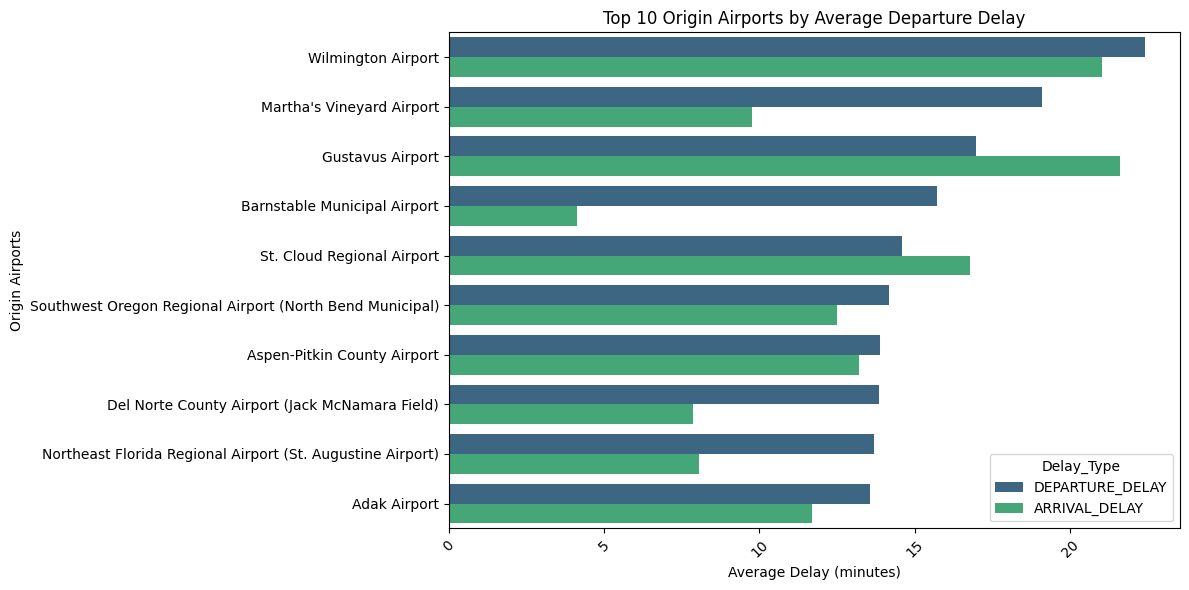

In [52]:
# Filter only non-numeric ORIGIN_AIRPORT values
filtered_airports_data = indigo_data.loc[
    ~indigo_data['ORIGIN_AIRPORT'].astype(str).str.isnumeric() &
    ~indigo_data['DESTINATION_AIRPORT'].astype(str).str.isnumeric()
]
# Group and aggregate the origin_airpot by depature delay and arrival_delay and selecting top 10 origin airports
origin_airport_stats = filtered_airports_data.groupby('ORIGIN_AIRPORT').agg({
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean'
}).round(2).nlargest(10, 'DEPARTURE_DELAY').reset_index()

plt.figure(figsize=(12, 6))
#grouped bar plot

# Melt the DataFrame to long format for seaborn
melted_stats = origin_airport_stats.melt(
    id_vars='ORIGIN_AIRPORT',
    value_vars=['DEPARTURE_DELAY', 'ARRIVAL_DELAY'],
    var_name='Delay_Type',
    value_name='Average_Delay'
)

# Plot figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

#plotting grouped bar plot as it is best for visualizing the categorial data and choosing top 10 average delayed locations
sns.barplot(
    data=melted_stats,
    x='Average_Delay',
    y='ORIGIN_AIRPORT',
    hue='Delay_Type',
    orient='h',
    palette='viridis'
)

# setting  titles and labels
plt.title('Top 10 Origin Airports by Average Departure Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Origin Airports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### **H2**:Flights scheduled between 01:00 AM and 04:30 AM show the highest average departure delays among all scheduled times.

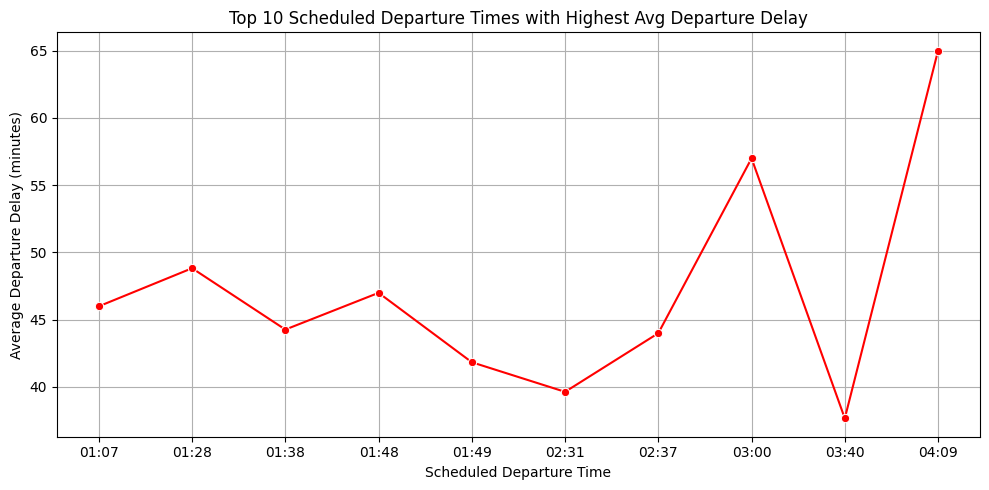

In [53]:
# grouping and aggregration depature delay by scheduled depature
depature_delay_by_schedule = indigo_data.groupby('SCHEDULED_DEPARTURE')['DEPARTURE_DELAY'].mean().round(2).reset_index()

# Sort and get top 10 scheduled departures with highest delay
top10_delays = depature_delay_by_schedule.sort_values(by='DEPARTURE_DELAY', ascending=False).head(10)

top10_delays['SCHEDULED_DEPARTURE'] = top10_delays['SCHEDULED_DEPARTURE'].astype(str)

# sorting  by time
top10_delays = top10_delays.sort_values(by='SCHEDULED_DEPARTURE')

# Plot figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(10, 5))

#plotting lineplot as it is best time series visualization
sns.lineplot(
    data=top10_delays,
    x='SCHEDULED_DEPARTURE',
    y='DEPARTURE_DELAY',
    marker='o',
    color='red'
)

#setting the labels and title
plt.title('Top 10 Scheduled Departure Times with Highest Avg Departure Delay')
plt.xlabel('Scheduled Departure Time')
plt.ylabel('Average Departure Delay (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


###### **H3**:Spirit Air Lines experiences the highest average departure delay(14 minutes), while Hawaiian Airlines Inc. has the lowest average departure delay among all airlines in the dataset.

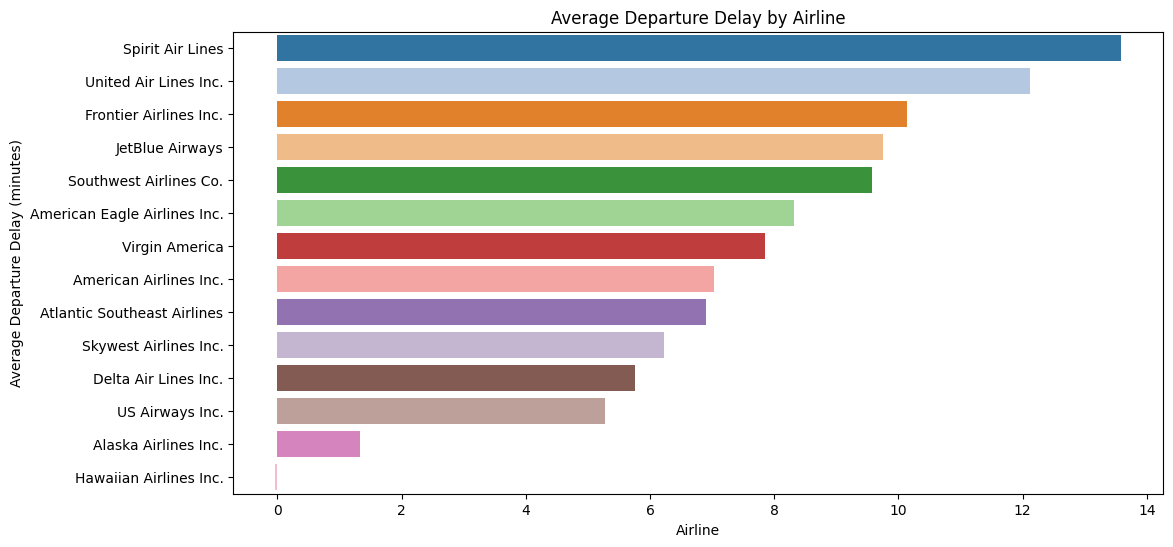

In [54]:
#group and aggregrating deapture delay by airline
airline_by_depature_delay = indigo_data.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().round(2).reset_index().sort_values(by='DEPARTURE_DELAY', ascending=False)

# Plot figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

# plotting horizontal bar chart as it is best for visualization for the categorical columns
sns.barplot(data=airline_by_depature_delay, x='DEPARTURE_DELAY', y='AIRLINE', orient='h' ,palette='tab20',hue='AIRLINE')

#setting the title and labels
plt.title('Average Departure Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

###### **H4**:The highest average departure delay at Wilmington Airport is on Thursdays (50 minutes), followed by Martha's Vineyard Airport on Tuesdays (43 minutes) and Barnstable Municipal Airport also on Tuesdays (29 minutes), indicating peak delays occur midweek at these airports.

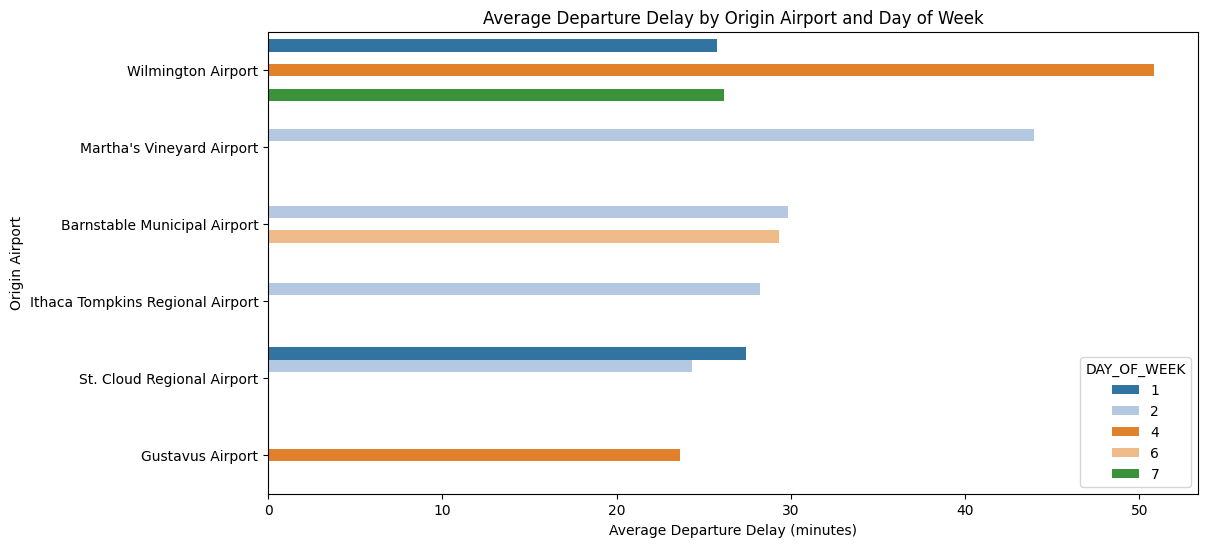

In [55]:
#Average departure delay by origin  airport per day
depature_delay_by_airport_day = filtered_airports_data.groupby(['ORIGIN_AIRPORT', 'DAY_OF_WEEK'])['DEPARTURE_DELAY'].mean().round(2).nlargest(10).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

#plotting horizontal grouped bar char as it is best for visualization for categorical colums
sns.barplot(data=depature_delay_by_airport_day, x='DEPARTURE_DELAY', y='ORIGIN_AIRPORT', hue='DAY_OF_WEEK', palette='tab20')

#setting the labels and title
plt.title('Average Departure Delay by Origin Airport and Day of Week')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Origin Airport')
plt.show()

###### **H5**: Flights scheduled in the afternoon(2pm) and late-night hours(11:35pm) tend to experience higher departure delays, especially for US Airways Inc. and Frontier Airlines Inc..

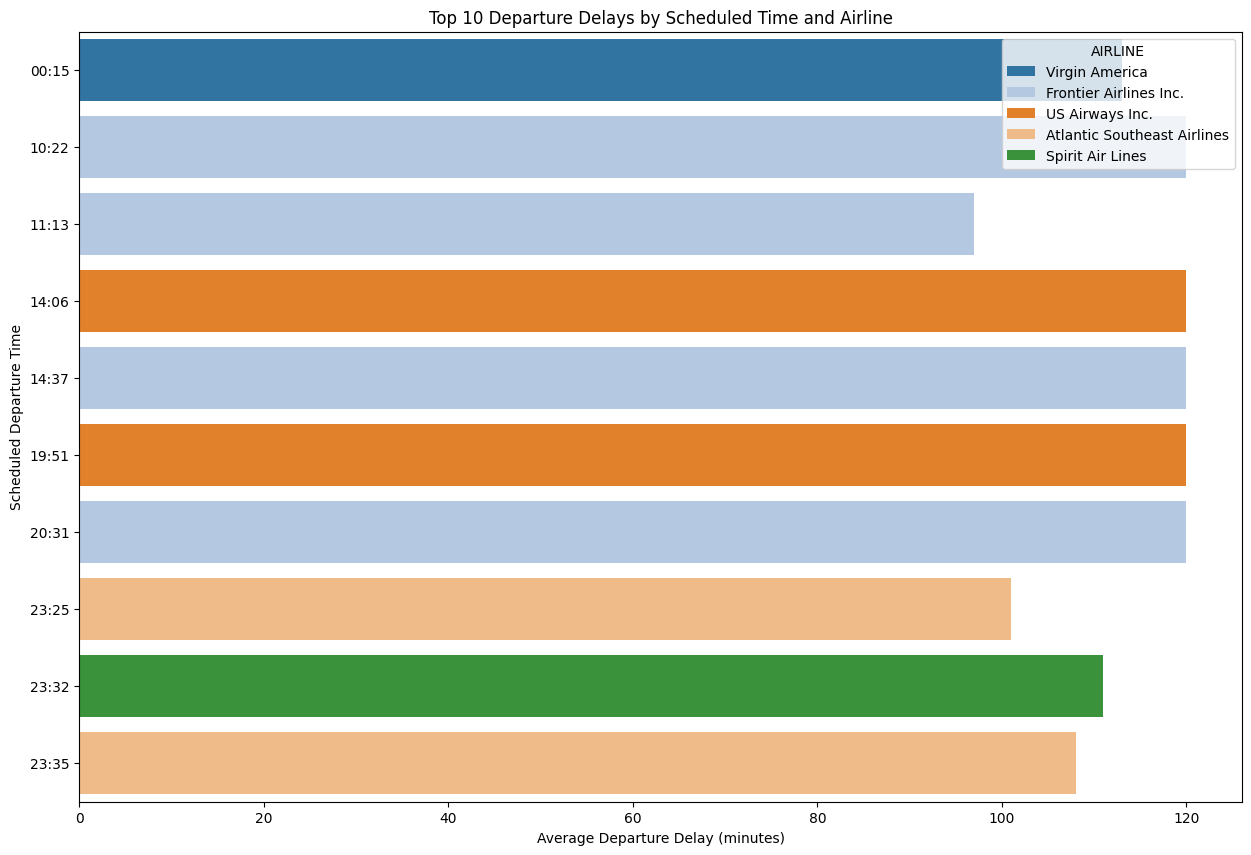

In [56]:
# Groupping and aggregrating  average departure delay by scheduled depature, airline
departure_delay_by_schedule_airline = indigo_data.groupby(['SCHEDULED_DEPARTURE', 'AIRLINE'])['DEPARTURE_DELAY'].mean().round(2).nlargest(10).sort_index().reset_index()

# Plotting  figure of width of width 15 inches and height 10 inches to ensure proper spacing and readability
plt.figure(figsize=(15, 10))
# plotting a barplot for categorical variables
sns.barplot(data=departure_delay_by_schedule_airline, x='DEPARTURE_DELAY', y='SCHEDULED_DEPARTURE', hue='AIRLINE', palette='tab20')
#setting the labels and title
plt.title('Top 10 Departure Delays by Scheduled Time and Airline')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Scheduled Departure Time')
plt.show()

######**H6**: The aircraft with tail number N121UA, N180UA has the highest average departure delay among, indicating it may have more frequent or severe operational issues compared to other aircraft.

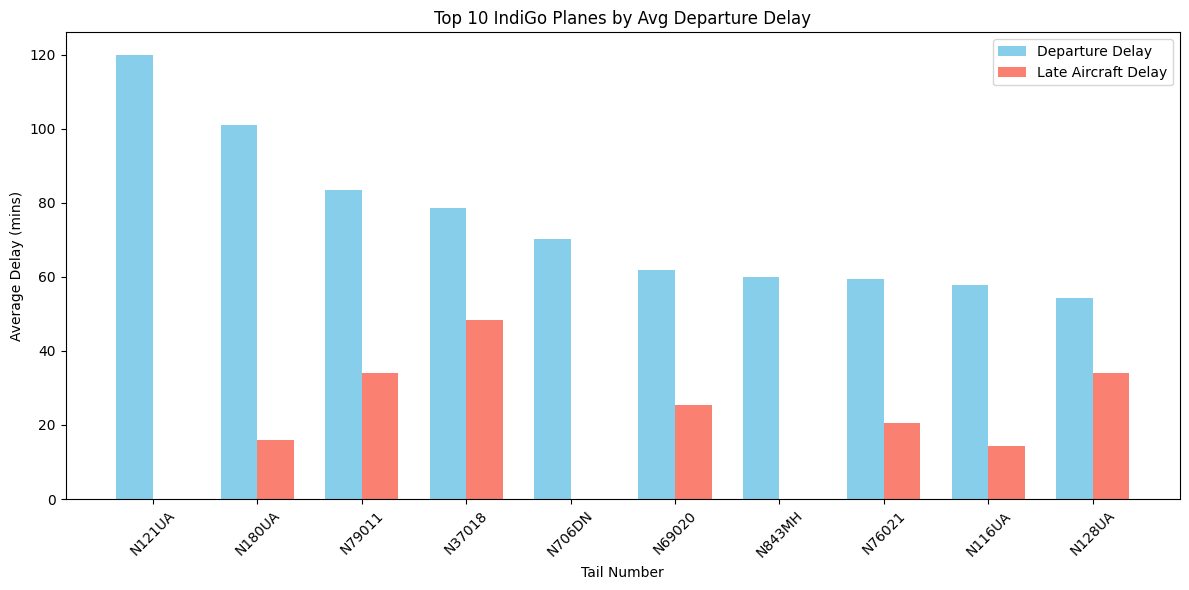

In [57]:
## Groupping and aggregrating  average departure delay and avg late aircraft delay by tailnumber
tail_number_by_depature_delay = indigo_data.groupby('TAIL_NUMBER').agg({
    'DEPARTURE_DELAY': 'mean',
    'LATE_AIRCRAFT_DELAY': 'mean'
}).round(2).nlargest(10, 'DEPARTURE_DELAY').reset_index()

df = tail_number_by_depature_delay
labels = df['TAIL_NUMBER']
departure = df['DEPARTURE_DELAY']
late_aircraft = df['LATE_AIRCRAFT_DELAY']

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(12,6))
bar1 = ax.bar(x - width/2, departure, width, label='Departure Delay', color='skyblue')
bar2 = ax.bar(x + width/2, late_aircraft, width, label='Late Aircraft Delay', color='salmon')

# Labels and title
ax.set_xlabel('Tail Number')
ax.set_ylabel('Average Delay (mins)')
ax.set_title('Top 10 IndiGo Planes by Avg Departure Delay')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()



######**H7**:John F. Kennedy International Airport and LaGuardia Airport have the highest average taxi-out times among origin airports, whereas smaller regional airports such as Canyonlands Field,Kodiak Airport exhibit the lowest average taxi-out times.

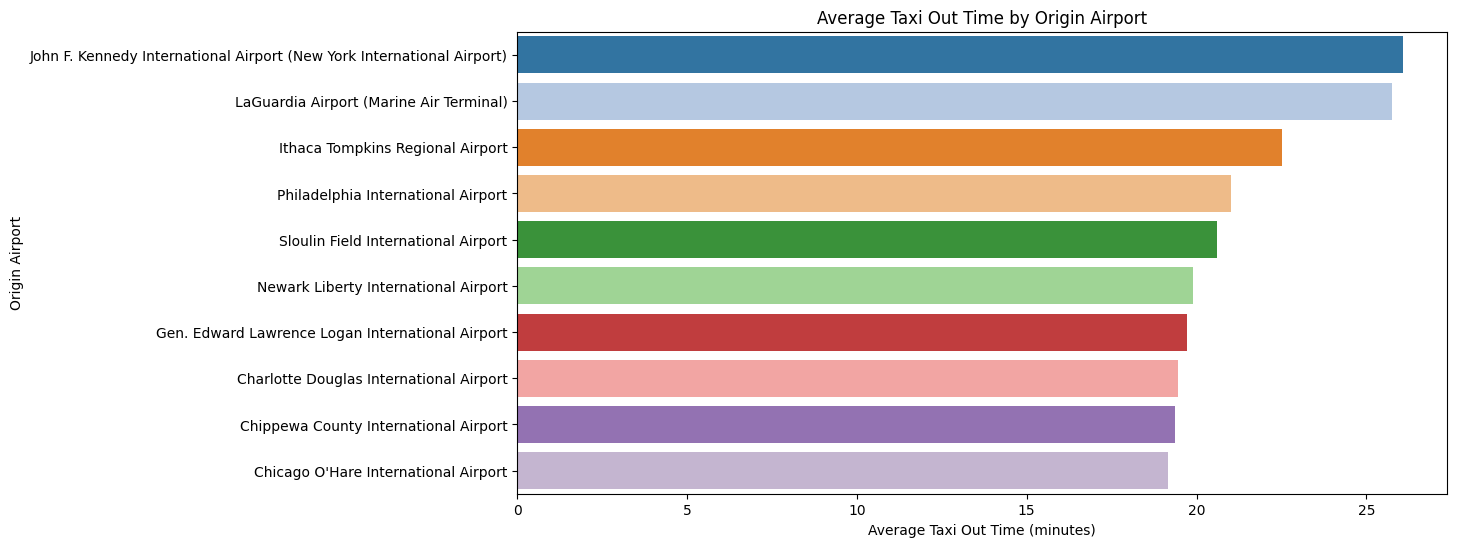

In [58]:
#grouping and aggregrating taxi out by origin airport
origin_airpot_by_taxi_out = filtered_airports_data.groupby('ORIGIN_AIRPORT')['TAXI_OUT'].mean().nlargest(10).round(2).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))
#plotting a horizontal barplot to view variation of origin airports by depature delay
sns.barplot(data=origin_airpot_by_taxi_out, x='TAXI_OUT', y='ORIGIN_AIRPORT', orient='h', palette='tab20', hue='ORIGIN_AIRPORT')

#setting labels and title
plt.title('Average Taxi Out Time by Origin Airport')
plt.xlabel('Average Taxi Out Time (minutes)')
plt.ylabel('Origin Airport')
plt.show()

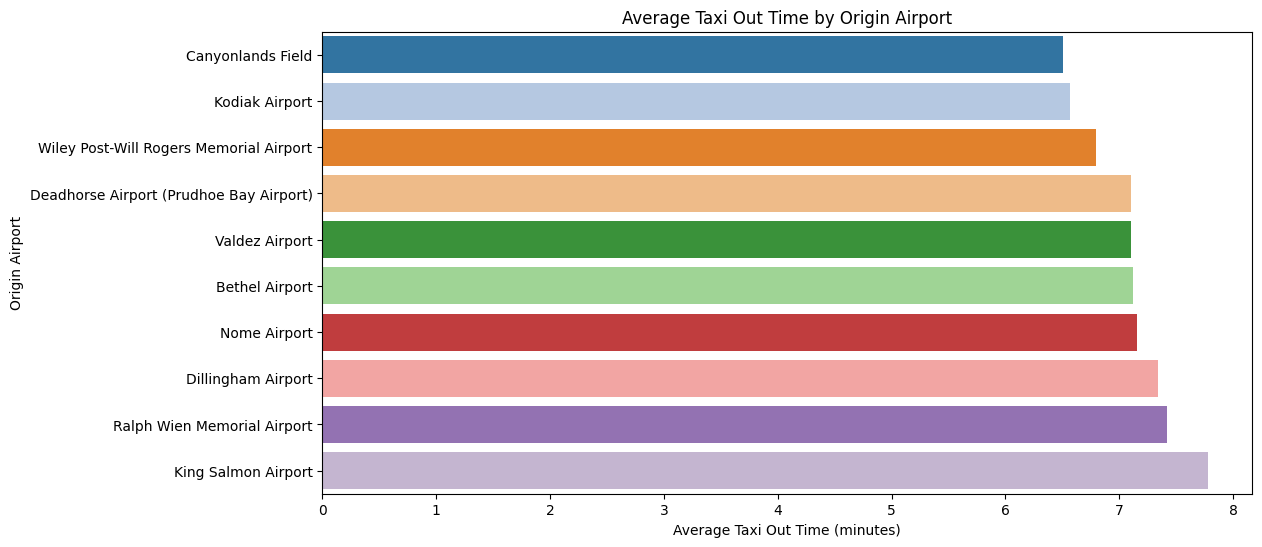

In [59]:
#grouping and aggregrating taxi out by origin airport and selecting least 10 airport
origin_airpot_by_taxi_out = filtered_airports_data.groupby('ORIGIN_AIRPORT')['TAXI_OUT'].mean().nsmallest(10).round(2).sort_values(ascending=True).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

#plotting a horizontal barplot to view variation of origin airports by depature delay
sns.barplot(data=origin_airpot_by_taxi_out, x='TAXI_OUT', y='ORIGIN_AIRPORT', orient='h', palette='tab20', hue='ORIGIN_AIRPORT')

#setting lables and title for the plot
plt.title('Average Taxi Out Time by Origin Airport')
plt.xlabel('Average Taxi Out Time (minutes)')
plt.ylabel('Origin Airport')
plt.show()

######**H8**:Flights scheduled around midnight to early morning (00:00 AM to 05:30 AM) and late evening (around 10:40 PM) have the highest average taxi-out times  among all scheduled departure times.

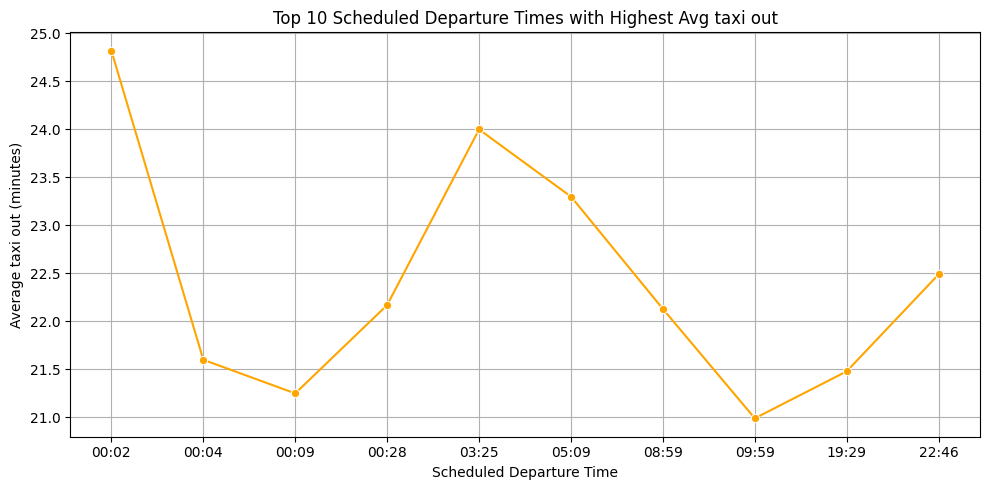

In [60]:
# grouping and aggregrating taxi out by schedule depature
taxi_out_by_schedule = indigo_data.groupby('SCHEDULED_DEPARTURE')['TAXI_OUT'].mean().round(2).reset_index()


# Sort and get top 10 scheduled departures with highest delay
top10_delays = taxi_out_by_schedule.sort_values(by='TAXI_OUT', ascending=False).head(10)

# treated as string for plotting purposes
top10_delays['SCHEDULED_DEPARTURE'] = top10_delays['SCHEDULED_DEPARTURE'].astype(str)

# sort by time (HHMM) for logical flow in x-axis
top10_delays = top10_delays.sort_values(by='SCHEDULED_DEPARTURE')

# Plotting  figure of width of width 10 inches and height 5 inches to ensure proper spacing and readability
plt.figure(figsize=(10, 5))

# plotting line graph  as best visualization for datetime variables
sns.lineplot(
    data=top10_delays,
    x='SCHEDULED_DEPARTURE',
    y='TAXI_OUT',
    marker='o',
    color='orange'
)

#setting labels and title
plt.title('Top 10 Scheduled Departure Times with Highest Avg taxi out')
plt.xlabel('Scheduled Departure Time')
plt.ylabel('Average taxi out (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


######**H9**:John F. Kennedy International Airport and LaGuardia Airport have higher average taxi out times on Thursdays and Fridays compared to other days of the week.

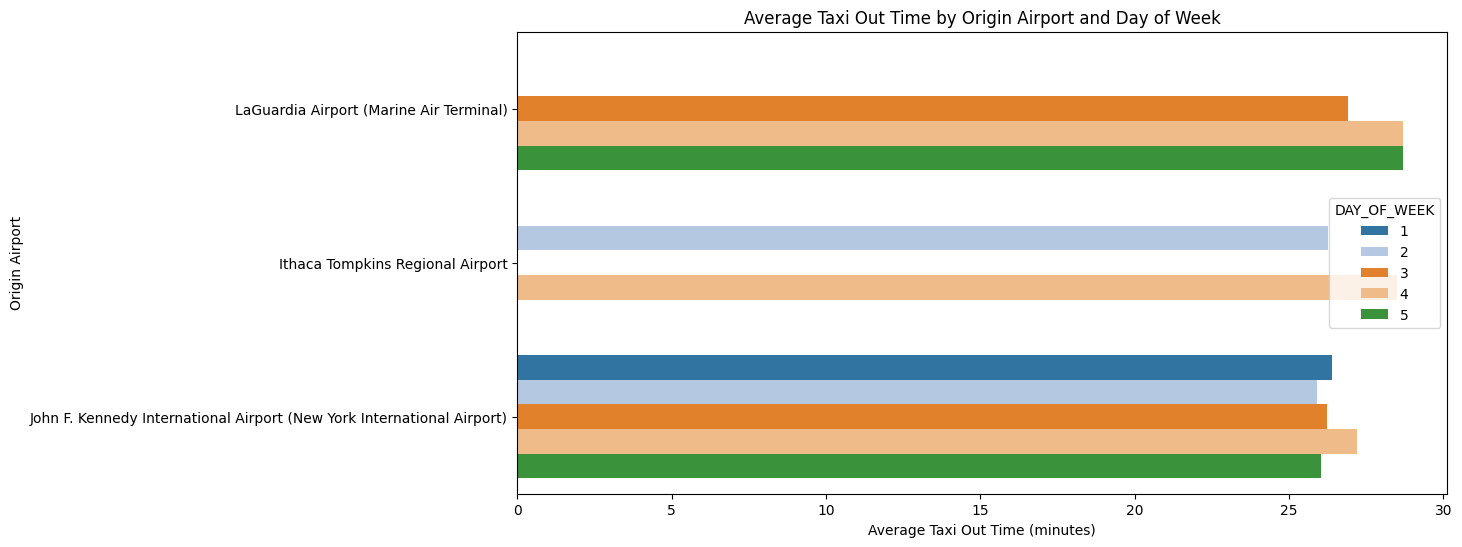

In [61]:
# grouping and aggregrating taxi out by origin airport and day of week
taxi_out_airport_day = filtered_airports_data.groupby(['ORIGIN_AIRPORT', 'DAY_OF_WEEK'])['TAXI_OUT'].mean().round(2).nlargest(10).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

sns.barplot(data=taxi_out_airport_day, x='TAXI_OUT', y='ORIGIN_AIRPORT', hue='DAY_OF_WEEK', palette='tab20')

#setting labels and tile for the graph
plt.title('Average Taxi Out Time by Origin Airport and Day of Week')
plt.xlabel('Average Taxi Out Time (minutes)')
plt.ylabel('Origin Airport')
plt.show()

######**H10**: Bangor International Airport in February (29.21 min), John F. Kennedy International Airport (JFK) in June–September (27.17–28.99 min, peak 28.99 min in July), and LaGuardia Airport (LGA) in June–July (26.66–27.96 min) have the highest average taxi-out times compared to other airports

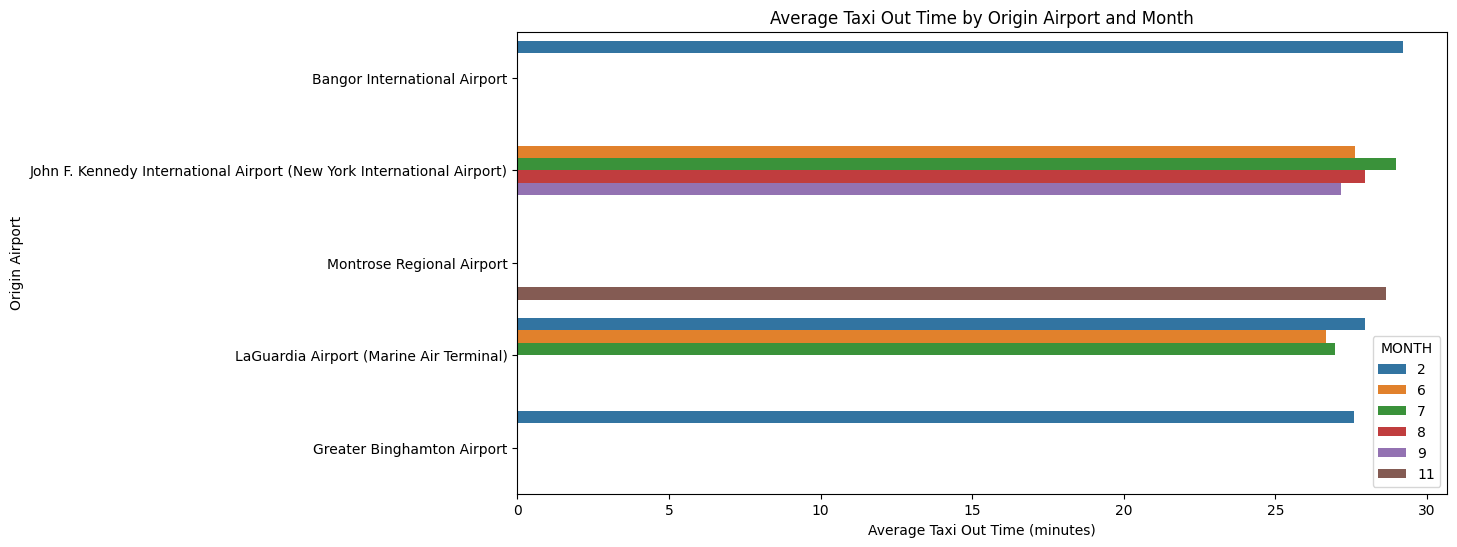

In [62]:
# grouping and aggregrating taxi out by origin airport and month
origin_airport_month_by_taxi_out = filtered_airports_data.groupby(['ORIGIN_AIRPORT', 'MONTH'])['TAXI_OUT'].mean().round(2).nlargest(10).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

sns.barplot(data=origin_airport_month_by_taxi_out, x='TAXI_OUT', y='ORIGIN_AIRPORT', hue='MONTH', palette='tab10')

#setting the labels and title
plt.title('Average Taxi Out Time by Origin Airport and Month')
plt.xlabel('Average Taxi Out Time (minutes)')
plt.ylabel('Origin Airport')
plt.show()

######**H11**:Flights scheduled for departure between 00:00 and 05:30 exhibit higher average taxi-out times, particularly on Mondays (Day 1), Saturdays (Day 6), and Sundays (Day 7), suggesting that both early-morning hours and certain days of the week contribute to increased taxi-out delays.

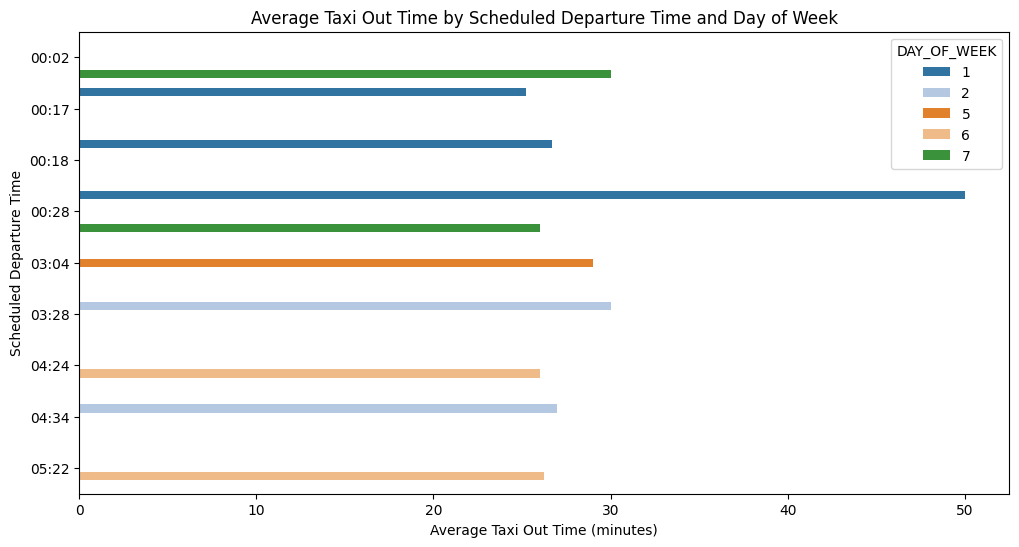

In [63]:
# grouping and aggregrating taxi out by scheduled depature and day_of_week
taxi_out_by_scheduled_depature_day = indigo_data.groupby(['SCHEDULED_DEPARTURE', 'DAY_OF_WEEK'])['TAXI_OUT'].mean().round(2).nlargest(10).sort_index().reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

sns.barplot(data=taxi_out_by_scheduled_depature_day, x='TAXI_OUT', y='SCHEDULED_DEPARTURE', hue='DAY_OF_WEEK', palette='tab20')

#setting labels and title
plt.title('Average Taxi Out Time by Scheduled Departure Time and Day of Week')
plt.xlabel('Average Taxi Out Time (minutes)')
plt.ylabel('Scheduled Departure Time')
plt.show()

ARRIVAL_DELAY

###### **H12**:Flights scheduled around 00:01 and 02:37 experience significantly higher average arrival delays compared to other departure times.

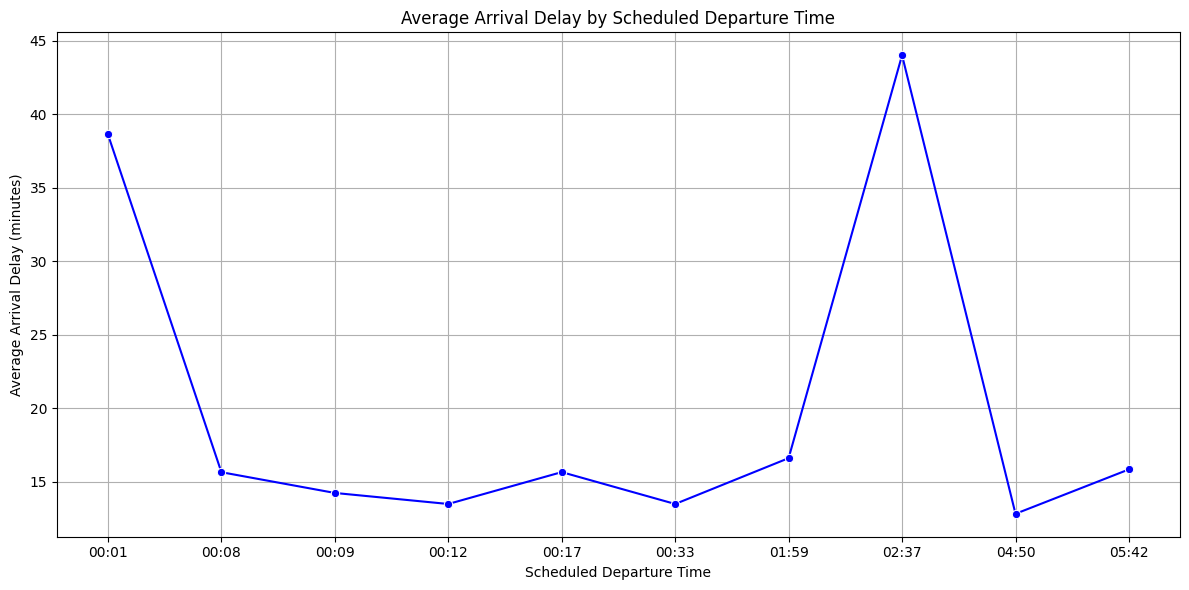

In [64]:
#grouping and agggregrating airline  delay by scheduled departure
airline_delay_by_schedule_depature = indigo_data.groupby(['SCHEDULED_DEPARTURE'])['AIRLINE_DELAY'].mean().nlargest(10).sort_index().reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

sns.lineplot(data=airline_delay_by_schedule_depature, x='SCHEDULED_DEPARTURE', y='AIRLINE_DELAY', marker='o', color='blue')

#setting labels and title
plt.title('Average Arrival Delay by Scheduled Departure Time')
plt.xlabel('Scheduled Departure Time')
plt.ylabel('Average Arrival Delay (minutes)')
plt.tight_layout()
plt.grid()
plt.show()


###### **H13**:The flight with number 6839 has the highest average airline delay of approximately 41 minutes, indicating it is significantly more delayed on average than other flights.

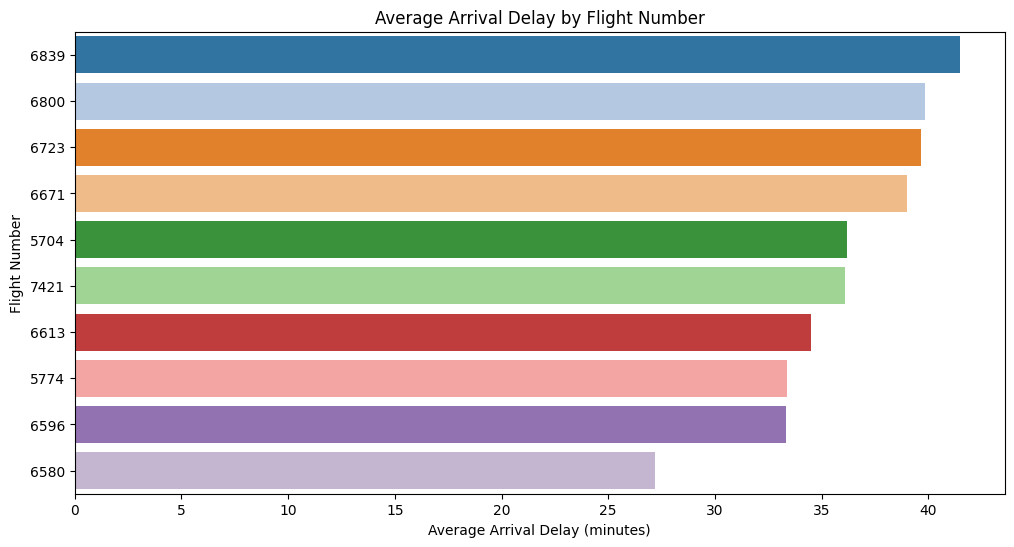

In [65]:
#grouping and agggregrating airline  delay by flight number
airline_delay_by_flight_number = indigo_data.groupby('FLIGHT_NUMBER')['AIRLINE_DELAY'].mean().nlargest(10).round(2).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

sns.barplot(data=airline_delay_by_flight_number, x='AIRLINE_DELAY', y='FLIGHT_NUMBER', orient='h', palette='tab20', hue='FLIGHT_NUMBER')

#setting labels and title
plt.title('Average Arrival Delay by Flight Number')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Flight Number')
plt.show()

###### **H14**: The aircraft with tail number N843MH from Delta Air Lines Inc. has the highest average airline delay of approximately 175 minutes, indicating a significantly higher delay compared to other aircraft across all airlines.

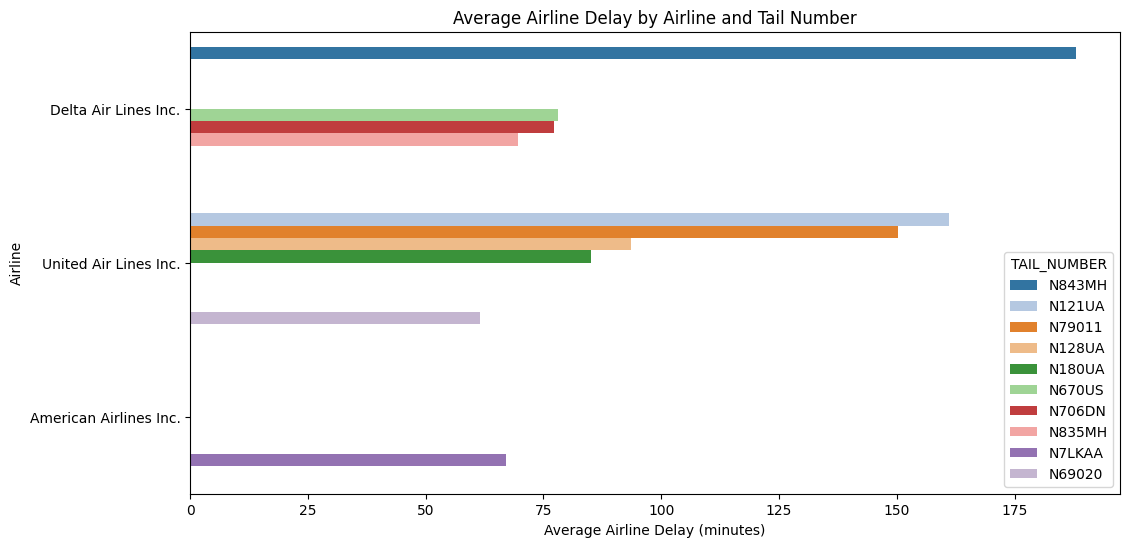

In [66]:
#grouping and agggregrating airline  delay by airline and tail_number
airline_delay_by_airline_tail_number  = indigo_data.groupby(['AIRLINE','TAIL_NUMBER'])['AIRLINE_DELAY'].mean().nlargest(10).round(2).reset_index()
plt.figure(figsize=(12, 6))

sns.barplot(data=airline_delay_by_airline_tail_number, x='AIRLINE_DELAY', y='AIRLINE', hue='TAIL_NUMBER', palette='tab20')
#setting labels and title
plt.title('Average Airline Delay by Airline and Tail Number')
plt.xlabel('Average Airline Delay (minutes)')
plt.ylabel('Airline')
plt.show()

###### **H15**:Flights originating from Pago Pago International Airport (Tafuna Airport) on Wednesday (Day 3) have a significantly higher average airline  delay (around 77 minutes) compared to other origin airports and days of the week.

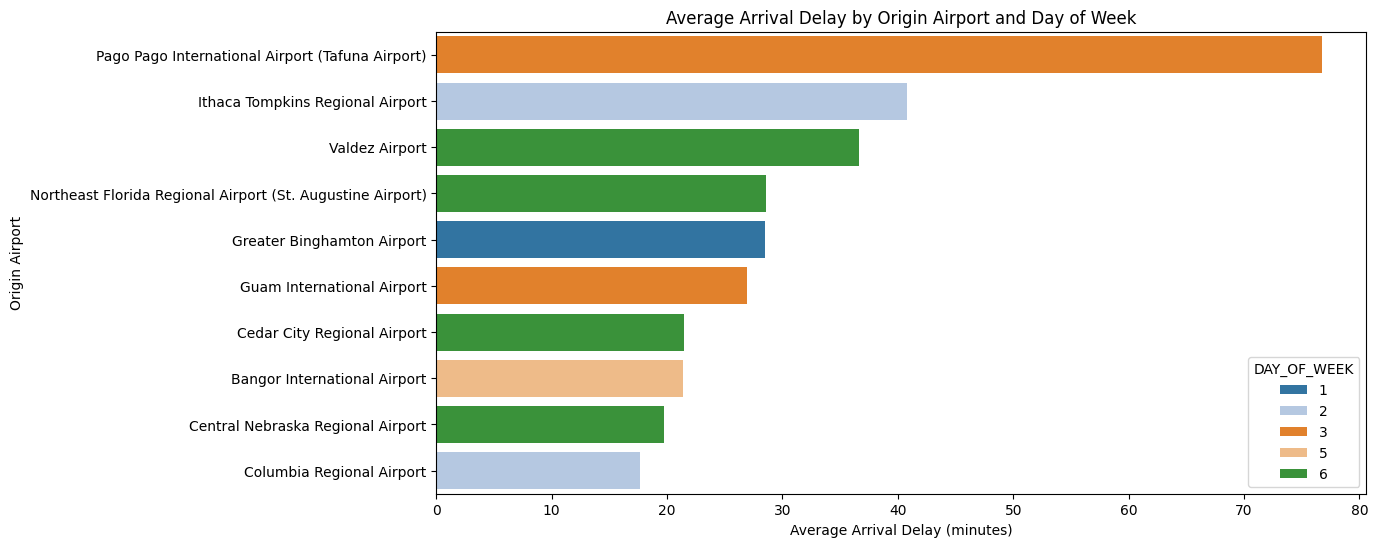

In [67]:
#grouping and agggregrating airline  delay by  origin airport and day_of_week
airline_delay_by_origin_airport_by_day = filtered_airports_data.groupby(['ORIGIN_AIRPORT','DAY_OF_WEEK'])['AIRLINE_DELAY'].mean().nlargest(10).round(2).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=airline_delay_by_origin_airport_by_day, x='AIRLINE_DELAY', y='ORIGIN_AIRPORT', hue='DAY_OF_WEEK', palette='tab20')

#setting labels and title
plt.title('Average Arrival Delay by Origin Airport and Day of Week')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Origin Airport')
plt.show()


###### **H16**:Flights scheduled to depart around midnight (e.g., 00:01, 00:27) and early morning hours (e.g., 05:12, 05:42) experience significantly higher average airline delays, particularly in March (3), July (7), and December (12), compared to other departure times.

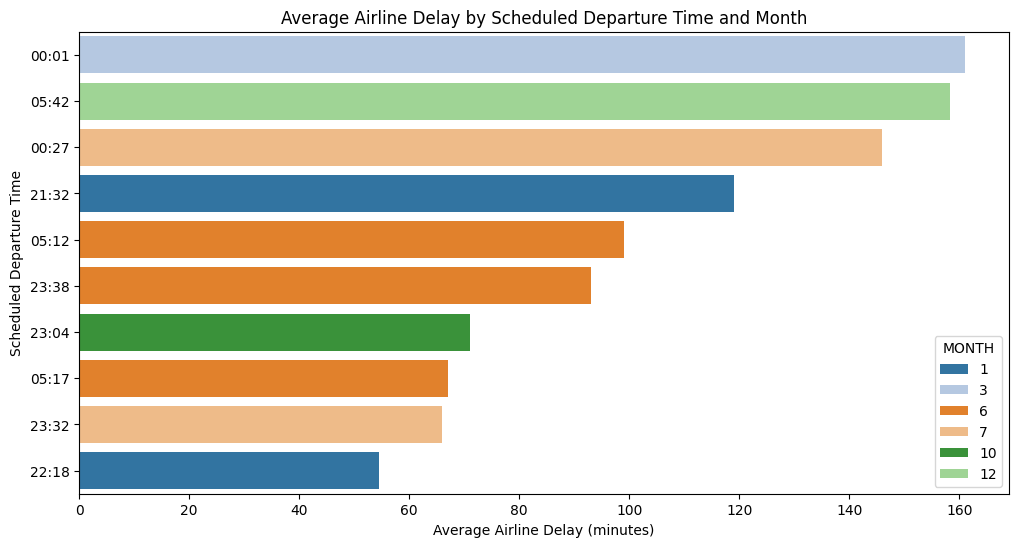

In [68]:
#grouping and agggregrating airline  delay by scheduled depature and month
airline_delay_by_schedule_depature_month = indigo_data.groupby(['SCHEDULED_DEPARTURE','MONTH'])['AIRLINE_DELAY'].mean().nlargest(10).round(2).reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(data=airline_delay_by_schedule_depature_month, x='AIRLINE_DELAY', y='SCHEDULED_DEPARTURE', hue='MONTH', palette='tab20')

#setting labels and title
plt.title('Average Airline Delay by Scheduled Departure Time and Month')
plt.xlabel('Average Airline Delay (minutes)')
plt.ylabel('Scheduled Departure Time')
plt.show()

###### **H17**:Flights originating from Newark Liberty International Airport show the highest average airline delay (300 minutes), with Minneapolis-Saint Paul International Airport as the destination. In contrast, flights from Minneapolis-Saint Paul International Airport have a much shorter airline delay (110 minutes).

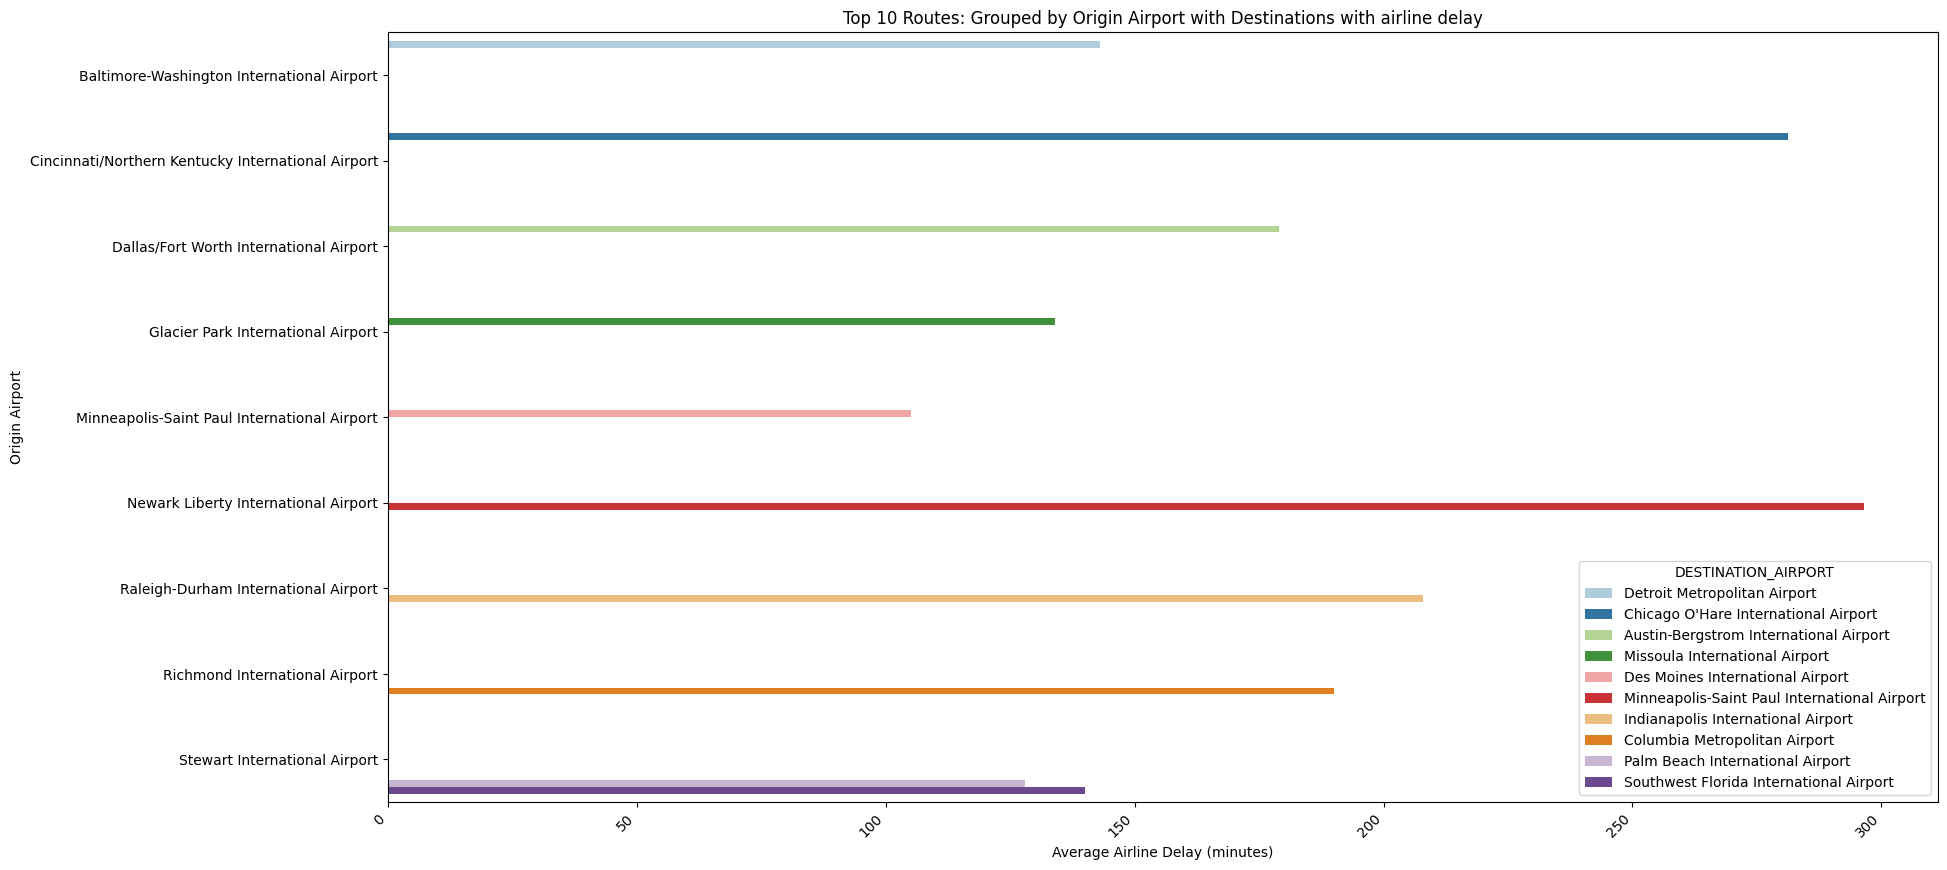

In [69]:
#grouping and agggregrating airline  delay by scheduled depature and month
airline_delay_by_airport_airline = filtered_airports_data.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE'])['AIRLINE_DELAY'].mean().nlargest(10).round(2).sort_index().reset_index()

plt.figure(figsize=(20, 10))
# Grouped bar plot: x = ORIGIN,y=airline delay hue = DESTINATION
sns.barplot(data=airline_delay_by_airport_airline,
            x='AIRLINE_DELAY',
            y='ORIGIN_AIRPORT',
            hue='DESTINATION_AIRPORT',
            orient='h',
            palette='Paired')
#setting labels and title
plt.title('Top 10 Routes: Grouped by Origin Airport with Destinations with airline delay')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better spacing
plt.xlabel('Average Airline Delay (minutes)')
plt.ylabel('Origin Airport')
plt.show()

######**H18**:Multiple flights from Atlantic Southeast Airlines and Frontier Airlines recorded average airline delays exceeding 2 hours, with some over 200 minutes

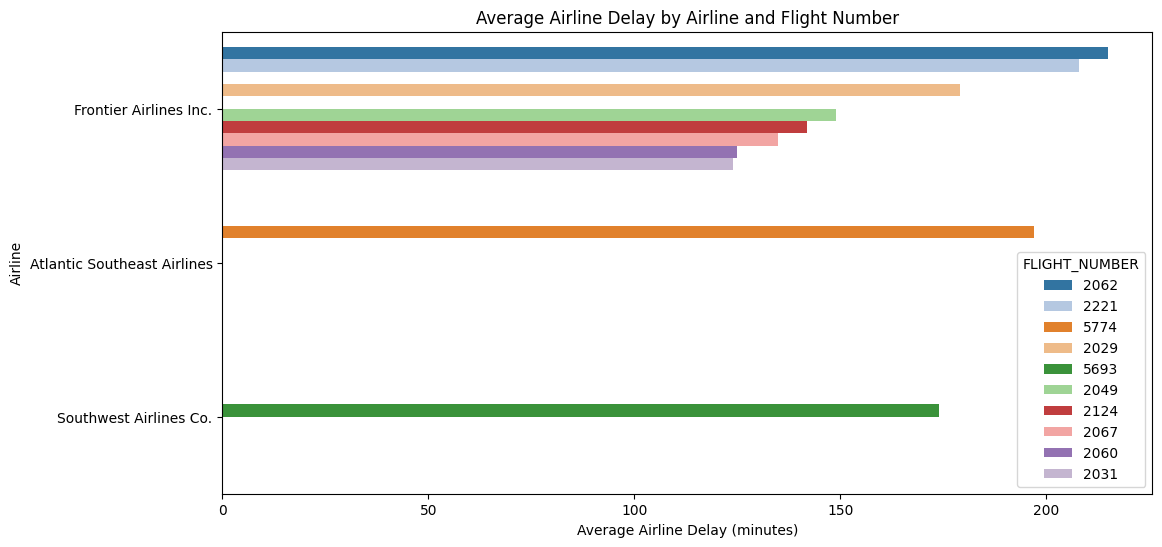

In [70]:
#grouping and agggregrating airline  delay by airline  and flight number
airline_delay_airline_number = indigo_data.groupby(['AIRLINE','FLIGHT_NUMBER'])['AIRLINE_DELAY'].mean().nlargest(10).round(2).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=airline_delay_airline_number, x='AIRLINE_DELAY', y='AIRLINE', hue='FLIGHT_NUMBER', palette='tab20')

#setting labels and title
plt.title('Average Airline Delay by Airline and Flight Number')
plt.xlabel('Average Airline Delay (minutes)')
plt.ylabel('Airline')
plt.show()

###### **H19**: Aircraft with tail numbers N37018, N128UA, and N79011 recorded the highest average arrival delays, each exceeding 30 minutes, indicating potential issues specific to those aircraft.

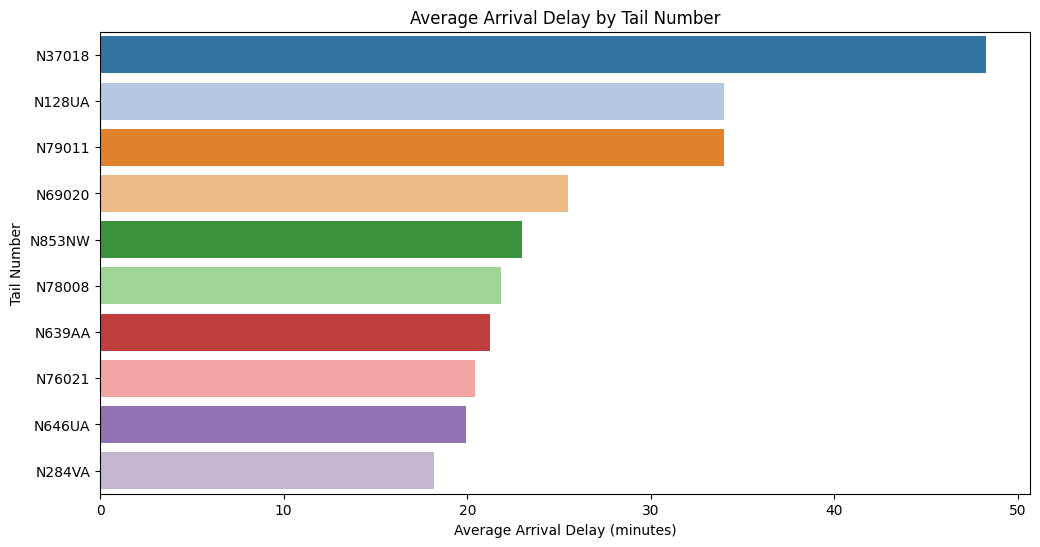

In [71]:
#grouping and agggregrating late aircraft   delay by tail number
late_aircraft_delay_by_tail_number = indigo_data.groupby('TAIL_NUMBER')['LATE_AIRCRAFT_DELAY'].mean().nlargest(10).round(2).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=late_aircraft_delay_by_tail_number, x='LATE_AIRCRAFT_DELAY', y='TAIL_NUMBER', orient='h', palette='tab20', hue='TAIL_NUMBER')

#setting labels and title
plt.title('Average Arrival Delay by Tail Number')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Tail Number')
plt.show()


###### **H20**: Flights originating from Gustavus Airport and Southwest Oregon Regional Airport show the highest average arrival delays among the listed airports, each exceeding 12 minutes.

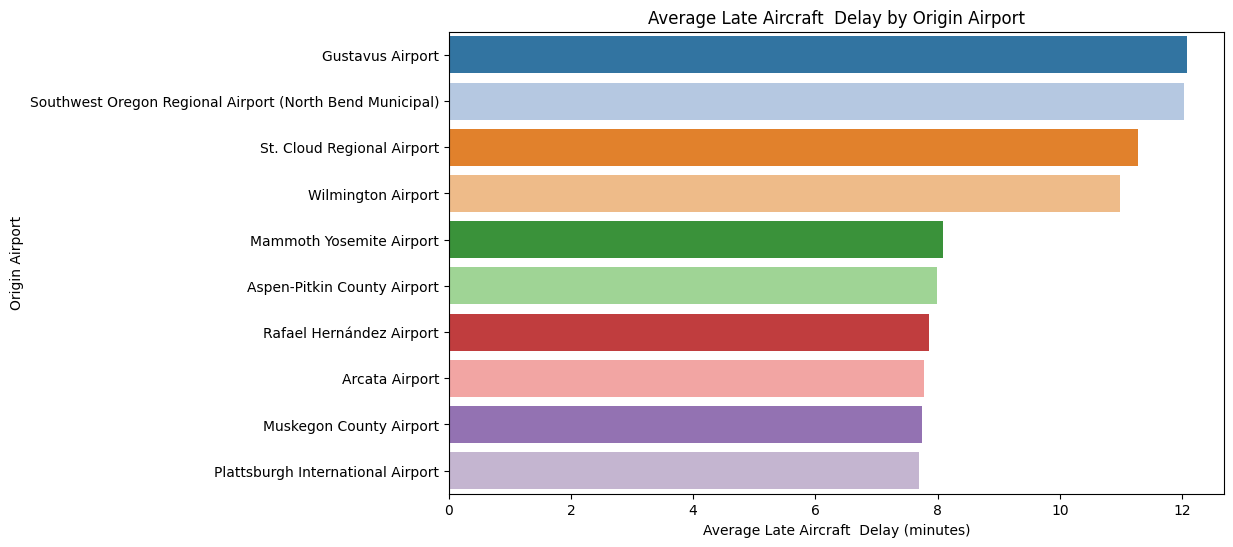

In [72]:
#grouping and agggregrating late aircraft   delay by origin airport
late_aircraft_by_origin_airport = filtered_airports_data.groupby(['ORIGIN_AIRPORT'])['LATE_AIRCRAFT_DELAY'].mean().nlargest(10).round(2).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=late_aircraft_by_origin_airport, x='LATE_AIRCRAFT_DELAY', y='ORIGIN_AIRPORT', orient='h', palette='tab20', hue='ORIGIN_AIRPORT')

#setting labels and title
plt.title('Average Late Aircraft  Delay by Origin Airport')
plt.xlabel('Average Late Aircraft  Delay (minutes)')
plt.ylabel('Origin Airport')
plt.show()

LATE_AIRCRAFT_DELAY

###### **H21**: Tail numbers N127UA, N771UA, and N79011 experienced the highest average late aircraft delays, each exceeding 100 minutes, primarily during the month of February

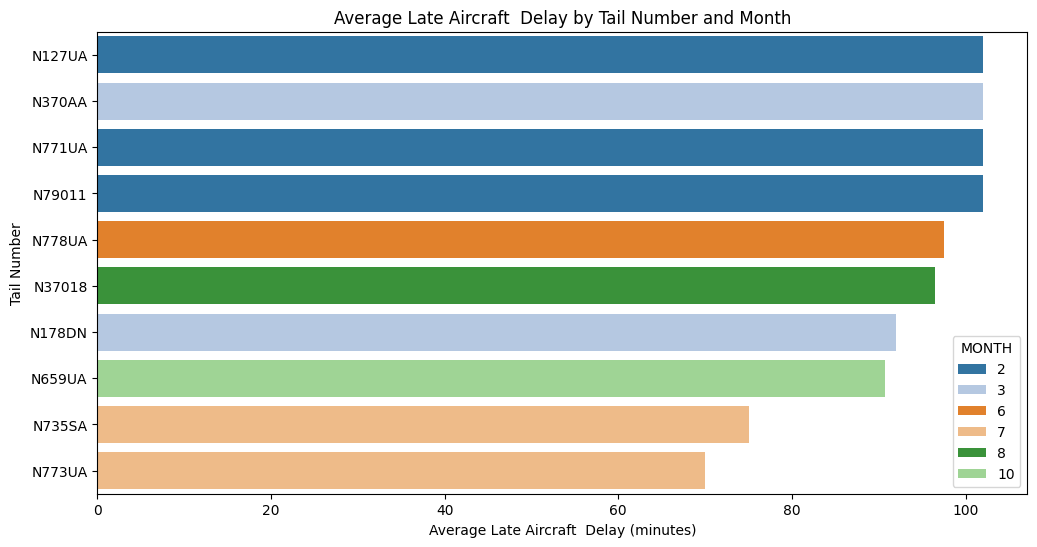

In [73]:
late_aricraft_delay_by_tail_month = indigo_data.groupby(['TAIL_NUMBER','MONTH'])['LATE_AIRCRAFT_DELAY'].mean().nlargest(10).round(2).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=late_aricraft_delay_by_tail_month, x='LATE_AIRCRAFT_DELAY', y='TAIL_NUMBER', hue='MONTH', palette='tab20')
plt.title('Average Late Aircraft  Delay by Tail Number and Month')
plt.xlabel('Average Late Aircraft  Delay (minutes)')
plt.ylabel('Tail Number')
plt.show()


###### **H22**:Flights departing around 2 AM experience the highest average late aircraft delay of 25 minutes, while flights between 10 AM and 7 PM have the lowest average delays, around 6–10 minutes

<ipython-input-74-93e535c8fc09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wheels_off['WHEELS_OFF'] = filtered_wheels_off['WHEELS_OFF'].astype(str)
<ipython-input-74-93e535c8fc09>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wheels_off['WHEELS_OFF_HOUR'] = filtered_wheels_off['WHEELS_OFF'].str[:2].astype(int)


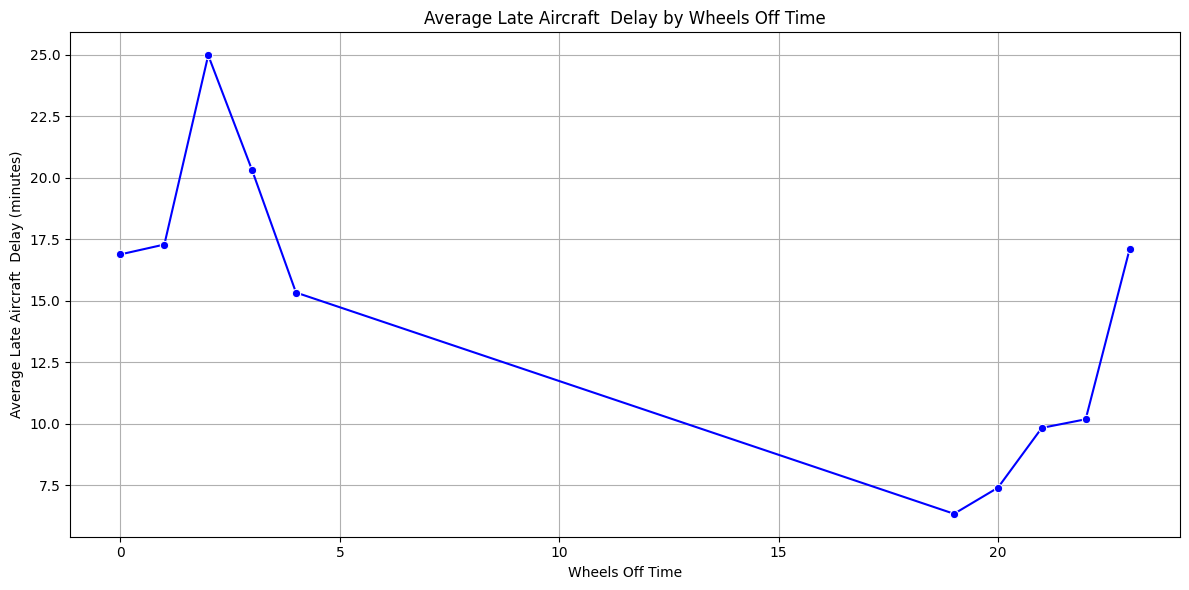

In [74]:
#grouping and aggregrating late aircraft delay by wheels_off
filtered_wheels_off = indigo_data[indigo_data['WHEELS_OFF'].notna()]

# Convert 'WHEELS_OFF' to string type before using .str
filtered_wheels_off['WHEELS_OFF'] = filtered_wheels_off['WHEELS_OFF'].astype(str)

# Extract the hour part from 'WHEELS_OFF'
filtered_wheels_off['WHEELS_OFF_HOUR'] = filtered_wheels_off['WHEELS_OFF'].str[:2].astype(int)
late_aircraft_delay_wheels_off = filtered_wheels_off.groupby(['WHEELS_OFF_HOUR'])['LATE_AIRCRAFT_DELAY'].mean().nlargest(10).round(2).sort_index().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=late_aircraft_delay_wheels_off, x='WHEELS_OFF_HOUR', y='LATE_AIRCRAFT_DELAY', marker='o', color='blue')

#setting labels and title
plt.title('Average Late Aircraft  Delay by Wheels Off Time')
plt.xlabel('Wheels Off Time')
plt.ylabel('Average Late Aircraft  Delay (minutes)')
plt.tight_layout()
plt.grid()
plt.show()

###### **H23**:Flights to St. Cloud Regional Airport and Wilmington Airport experience the highest total delays (30–36 minutes), while delays to other destinations are generally lower (16–25 minutes).



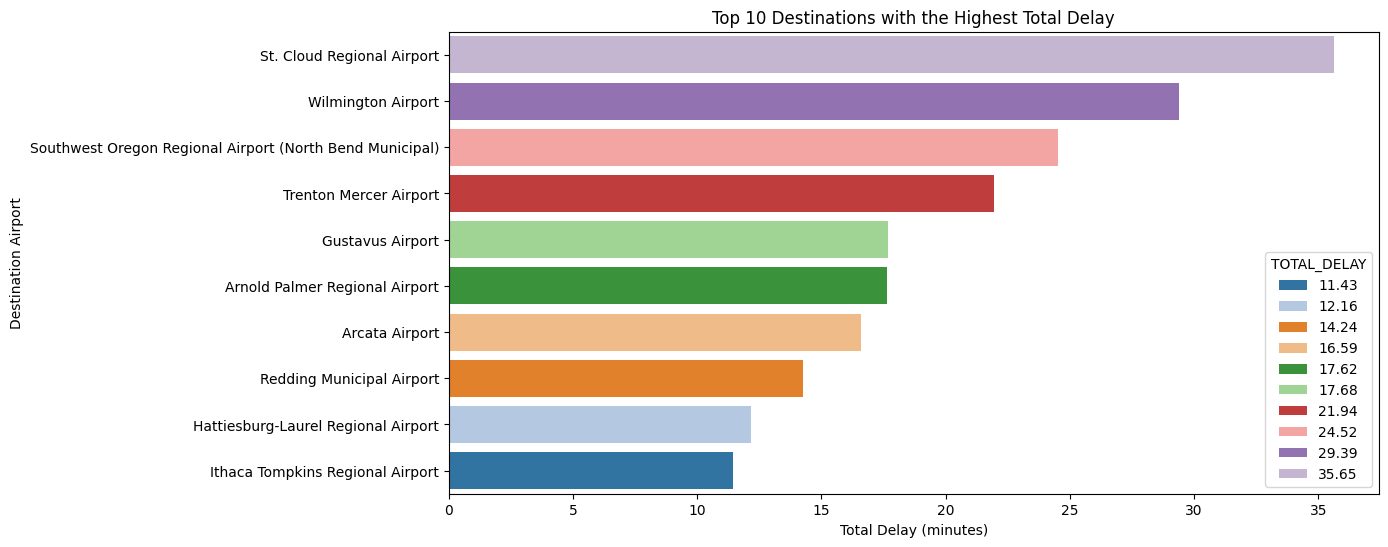

In [75]:
mean_late_arr_by_dest = filtered_airports_data.groupby('DESTINATION_AIRPORT')[['LATE_AIRCRAFT_DELAY', 'ARRIVAL_DELAY']].mean().nlargest(10,'LATE_AIRCRAFT_DELAY').round(2).reset_index()
mean_late_arr_by_dest['TOTAL_DELAY'] = mean_late_arr_by_dest['LATE_AIRCRAFT_DELAY'] + mean_late_arr_by_dest['ARRIVAL_DELAY']
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_late_arr_by_dest.sort_values('TOTAL_DELAY', ascending=False).head(10), x='TOTAL_DELAY', y='DESTINATION_AIRPORT', orient='h', palette='tab20', hue='TOTAL_DELAY')
plt.title('Top 10 Destinations with the Highest Total Delay')
plt.xlabel('Total Delay (minutes)')
plt.ylabel('Destination Airport')
plt.show()

SECURITY_DELAY

######**H24**: Security delays vary by airport and weekday, with Adak Airport peaking on Day 4 (9.23 min) and Gustavus Airport showing moderate delays on Days 4–7. Other airports like Kodiak and Merle K. Smith have minimal delays (<2 min).

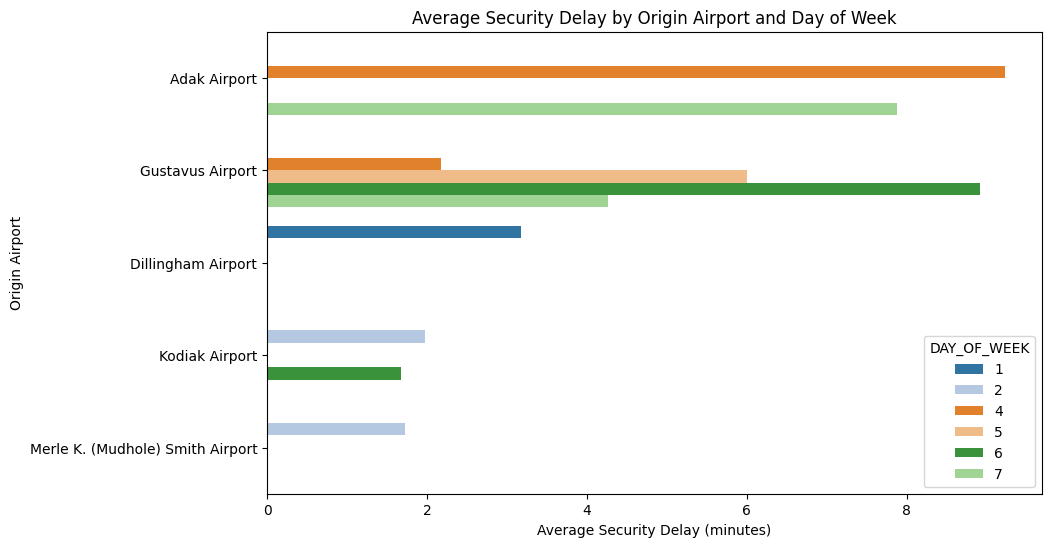

In [76]:
security_delay_by_origin_airport_day = filtered_airports_data.groupby(['ORIGIN_AIRPORT','DAY_OF_WEEK'])['SECURITY_DELAY'].mean().nlargest(10).round(2).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=security_delay_by_origin_airport_day,x='SECURITY_DELAY',y='ORIGIN_AIRPORT',hue='DAY_OF_WEEK',orient='h',palette='tab20')
plt.title('Average Security Delay by Origin Airport and Day of Week')
plt.xlabel('Average Security Delay (minutes)')
plt.ylabel('Origin Airport')
plt.show()

##### **2.In Flight Segment**

AIR_TIME

######**H25**:Flights originating from Guam International Airport and Pago Pago International Airport have the highest average air times among the other origin airports.

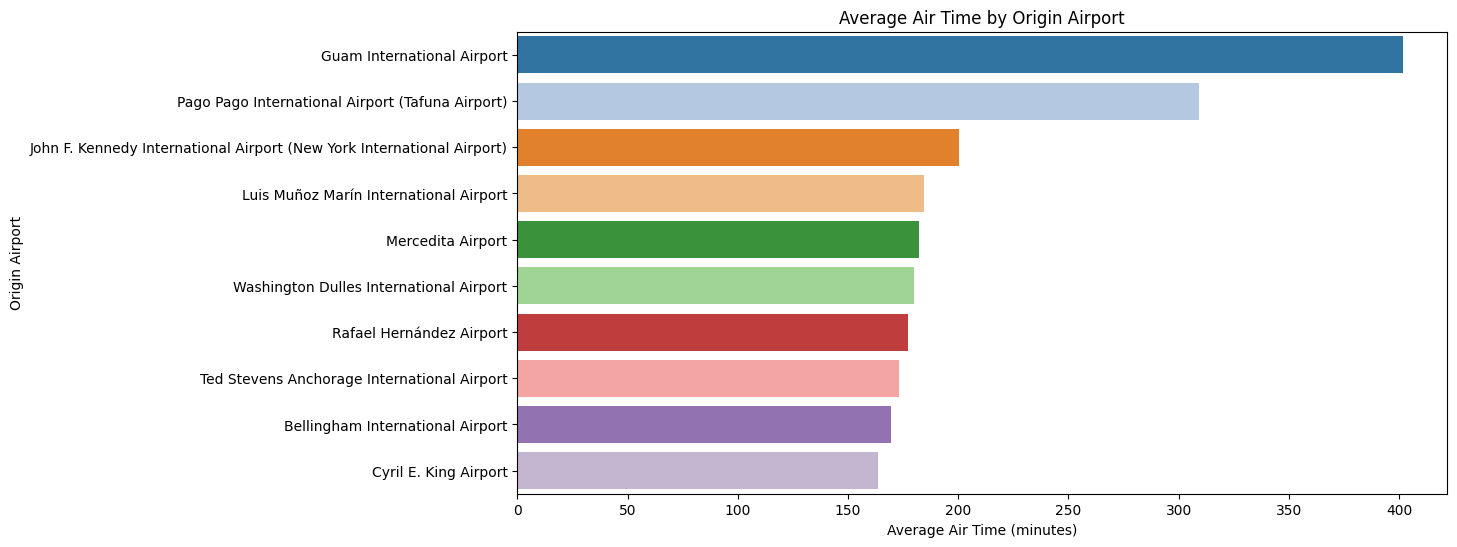

In [77]:
#grouping and aggregrating air time by origin airport
origin_airport_by_air_time = filtered_airports_data.groupby('ORIGIN_AIRPORT')['AIR_TIME'].mean().nlargest(10).round(2).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))


sns.barplot(data=origin_airport_by_air_time, x='AIR_TIME', y='ORIGIN_AIRPORT', orient='h', palette='tab20', hue='ORIGIN_AIRPORT')

#setting the labels and title
plt.title('Average Air Time by Origin Airport')
plt.xlabel('Average Air Time (minutes)')
plt.ylabel('Origin Airport')
plt.show()

###### **H26**:Flights originating  from John F. Kennedy International Airport (JFK) ,Newark Liberty International Airport	 to destination  Honolulu International Airport (HNL) exhibit consistently high average air time greater than  10 hours

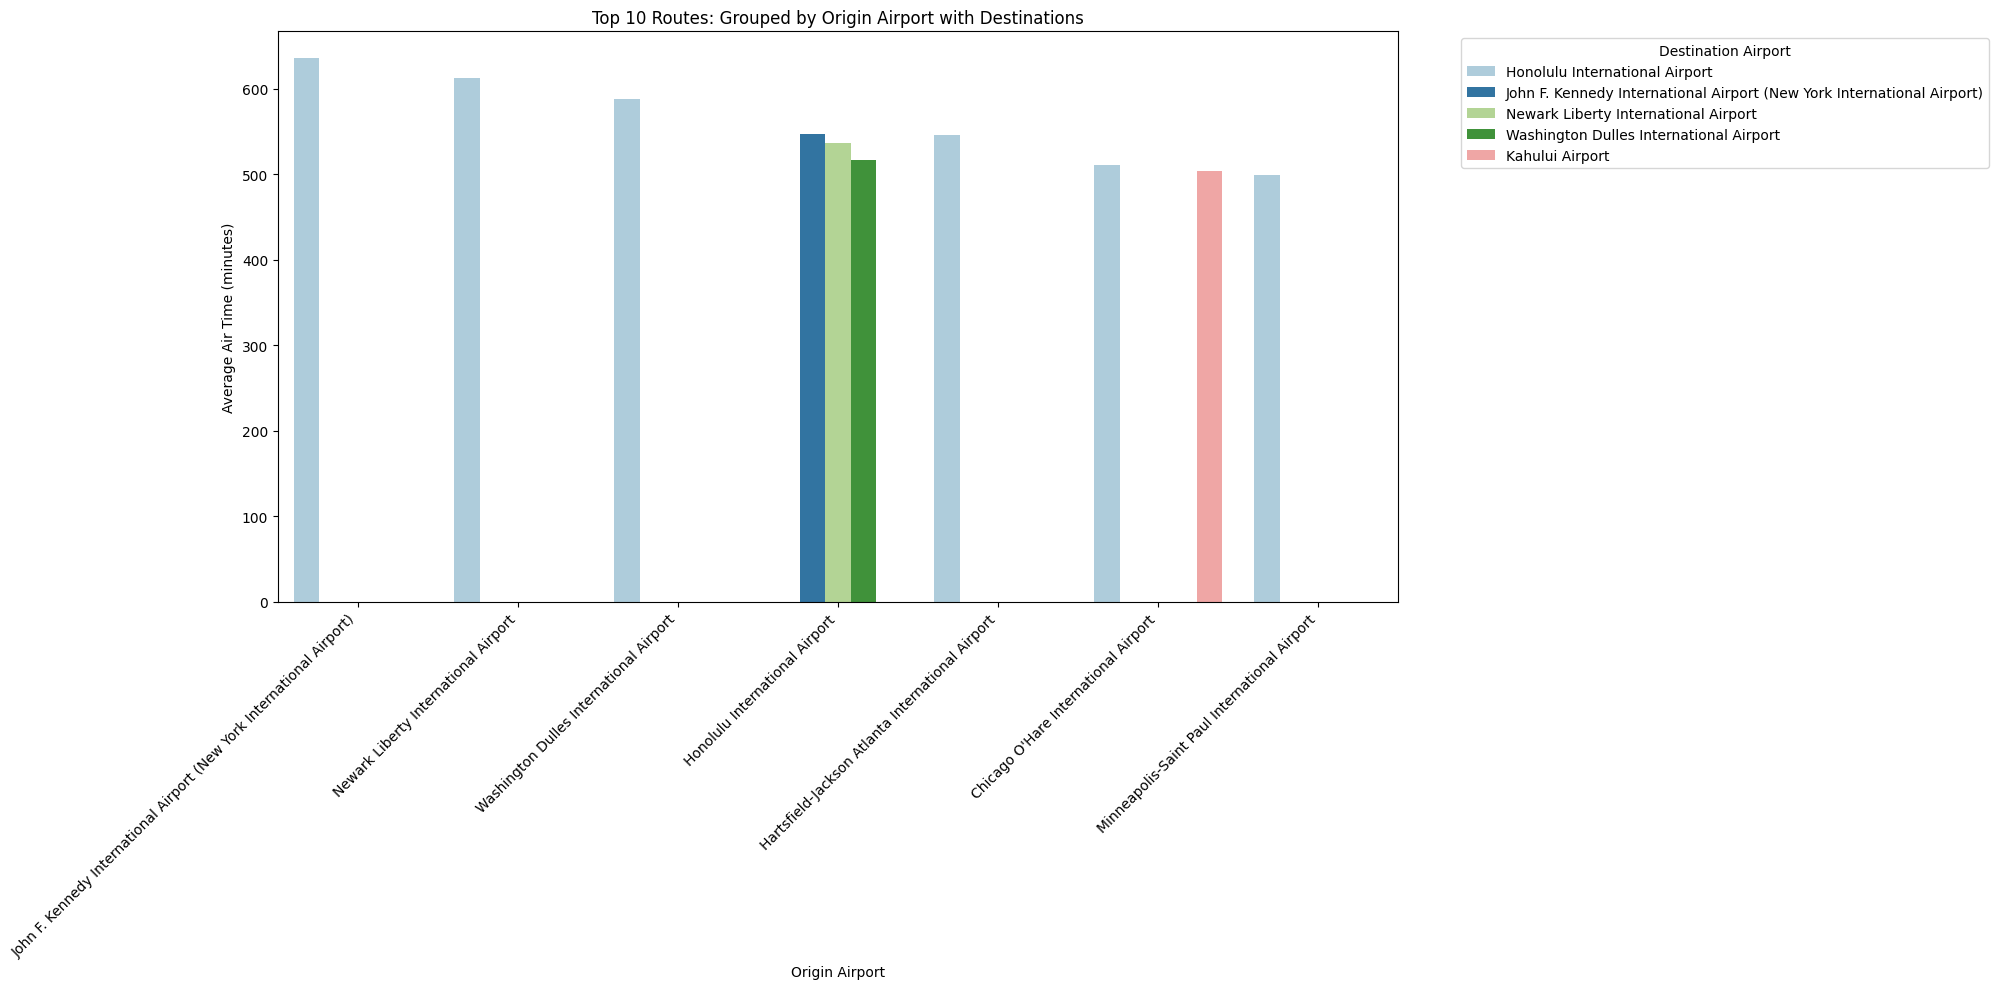

In [78]:
#grouping and aggregrating air time by origin airport and destination airport pair
airport_by_air_time = filtered_airports_data.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'])['AIR_TIME'].mean().nlargest(10).round(2).reset_index()
# Plotting  figure of width of width 20 inches and height 10 inches to ensure proper spacing and readability
plt.figure(figsize=(20, 10))
# Grouped bar plot: x = ORIGIN, hue = DESTINATION
sns.barplot(data=airport_by_air_time,
            x='ORIGIN_AIRPORT',
            y='AIR_TIME',
            hue='DESTINATION_AIRPORT',
            palette='Paired')

# setting  labels and title
plt.title('Top 10 Routes: Grouped by Origin Airport with Destinations')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better spacing

plt.xlabel('Origin Airport')
plt.ylabel('Average Air Time (minutes)')
plt.legend(title='Destination Airport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###### **H27**:Flights scheduled between 00:08 and 01:52 (midnight to 2 AM) show higher average air times, often ranging between 4.9 to 5.3 hours. This trend is especially notable on Wednesdays (Day 3) and Fridays (Day 5).

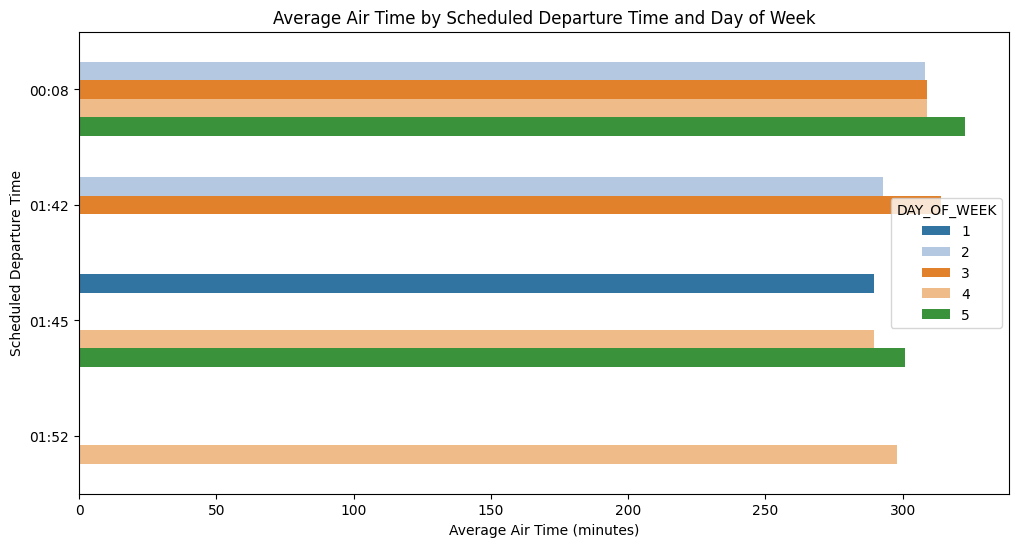

In [79]:
#grouping and aggregrating air time by origin airport and destination airport pair
air_time_by_scheduled_depature_day_of_week = indigo_data.groupby(['SCHEDULED_DEPARTURE', 'DAY_OF_WEEK'])['AIR_TIME'].mean().round(2).nlargest(10).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))
sns.barplot(data=air_time_by_scheduled_depature_day_of_week, x='AIR_TIME', y='SCHEDULED_DEPARTURE', hue='DAY_OF_WEEK', palette='tab20')
#setting the labels and title
plt.title('Average Air Time by Scheduled Departure Time and Day of Week')
plt.xlabel('Average Air Time (minutes)')
plt.ylabel('Scheduled Departure Time')
plt.show()



---



WEATHER_DELAY

######**H28**:In the month of February (Month 2), the route from Washington Dulles International Airport to Trenton Mercer Airport recorded the highest average weather delay, exceeding 175 minutes, among all observed routes.

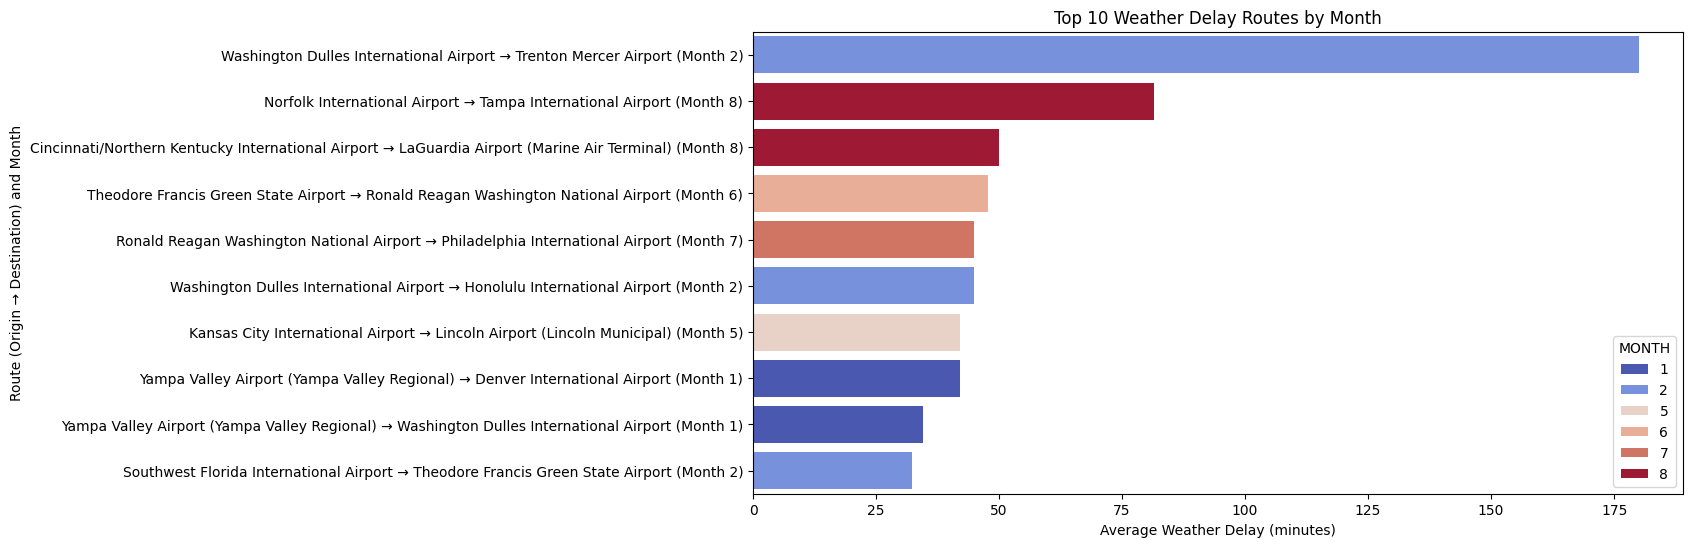

In [80]:
weather_delay_by_airport_month = filtered_airports_data.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT','MONTH'])['WEATHER_DELAY'].mean().nlargest(10).round(2).reset_index()
weather_delay_by_airport_month['Route_Month'] = (
    weather_delay_by_airport_month['ORIGIN_AIRPORT'] + ' → ' +
    weather_delay_by_airport_month['DESTINATION_AIRPORT'] +
    ' (Month ' + weather_delay_by_airport_month['MONTH'].astype(str) + ')'
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=weather_delay_by_airport_month,
    x='WEATHER_DELAY',
    y='Route_Month',
    hue='MONTH',
    orient='h',
    palette='coolwarm'
)
plt.title('Top 10 Weather Delay Routes by Month')
plt.xlabel('Average Weather Delay (minutes)')
plt.ylabel('Route (Origin → Destination) and Month')
plt.show()


###### **H29**:  Weather delays peak during **late-night departures**, with the highest delays occurring around **23:11 in January** and **22:49 in December**.

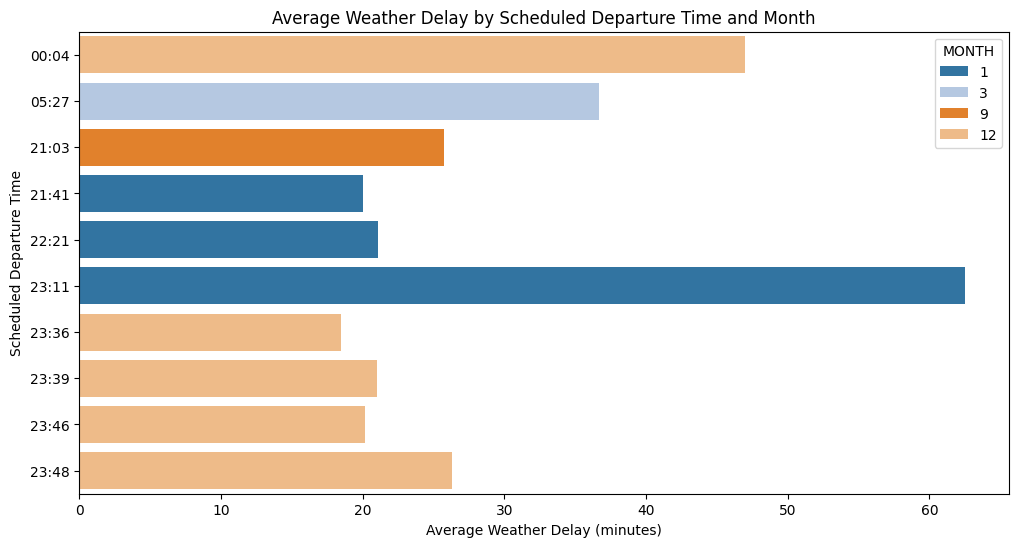

In [81]:
weather_delay_by_schedule_depature_month = indigo_data.groupby(['SCHEDULED_DEPARTURE','MONTH'])['WEATHER_DELAY'].mean().nlargest(10).round(2).sort_index().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(data=weather_delay_by_schedule_depature_month, x='WEATHER_DELAY', y='SCHEDULED_DEPARTURE', hue='MONTH', palette='tab20')
plt.title('Average Weather Delay by Scheduled Departure Time and Month')
plt.xlabel('Average Weather Delay (minutes)')
plt.ylabel('Scheduled Departure Time')
plt.show()


######**H30**:Flights between 0–3 hours have the longest average distances (1450–1500 miles). Daytime flights (6–17 hours) are shorter (800–900 miles), with a rise again after 20 hours (~1200 miles).

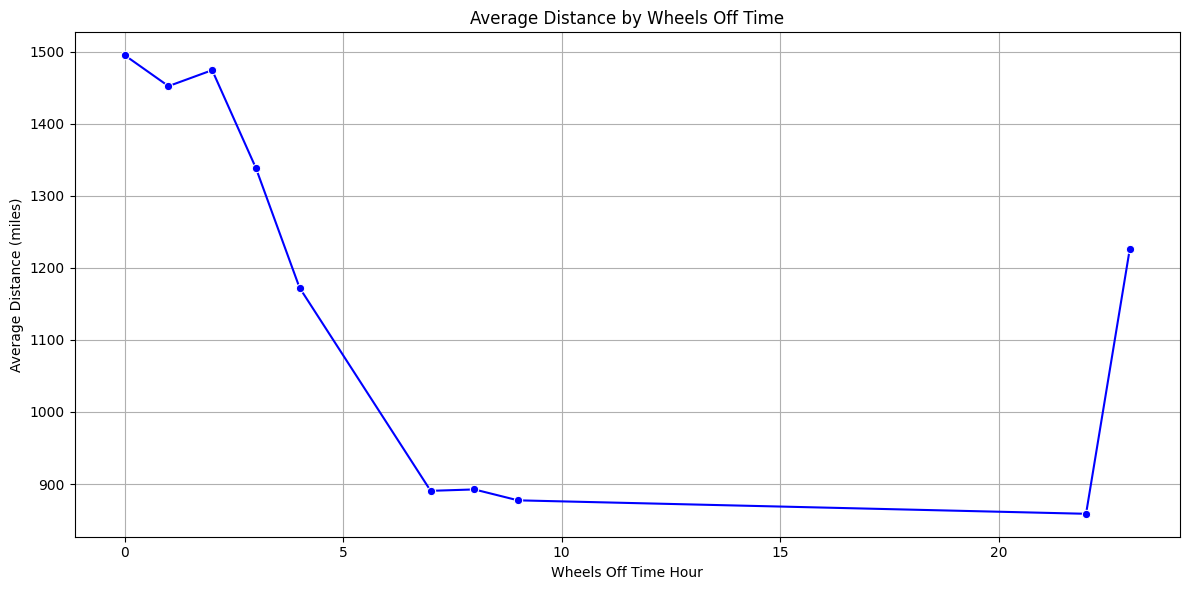

In [82]:

distance_by_wheels_off_hour = filtered_wheels_off.groupby(['WHEELS_OFF_HOUR'])['DISTANCE'].mean().nlargest(10).round(2).sort_index().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=distance_by_wheels_off_hour, x='WHEELS_OFF_HOUR', y='DISTANCE', marker='o', color='blue')
plt.title('Average Distance by Wheels Off Time')
plt.xlabel('Wheels Off Time Hour')
plt.ylabel('Average Distance (miles)')
plt.tight_layout()
plt.grid()
plt.show()

######**H31**:Flights with wheels-off times between 0–3 hours have the longest average distances (1350–1400 miles) and longer air times (170–180 mins), while those after 4 hours show shorter distances (800–1200 miles) with lower air times (114–153 mins).

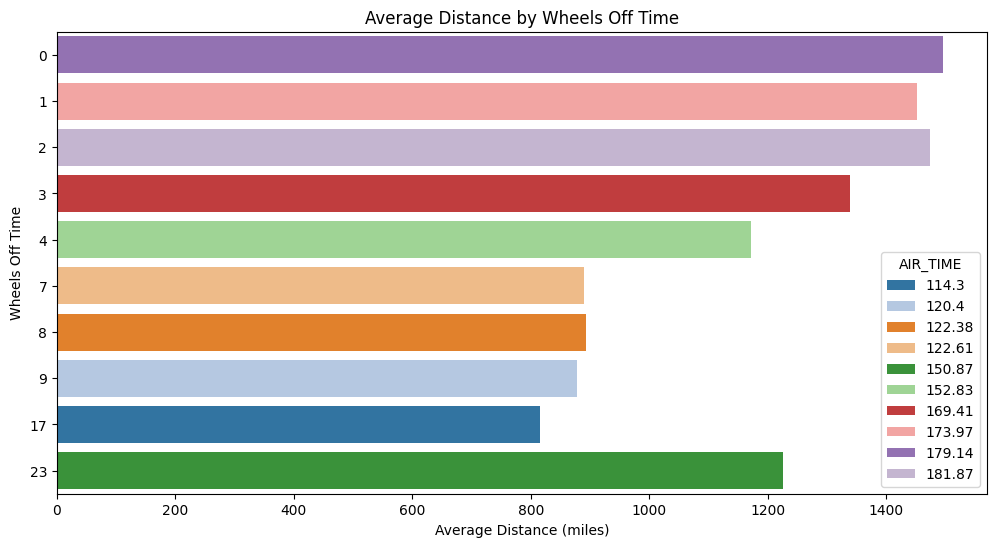

In [83]:

# Group by the hour and calculate the mean of 'DISTANCE' and 'AIR_TIME'
mean_dist_air_by_off_hour = filtered_wheels_off.groupby('WHEELS_OFF_HOUR')[['DISTANCE', 'AIR_TIME']].mean().nlargest(10,'AIR_TIME').round(2).reset_index()

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_dist_air_by_off_hour, x='DISTANCE', y='WHEELS_OFF_HOUR', orient='h', palette='tab20', hue='AIR_TIME')
plt.title('Average Distance by Wheels Off Time')
plt.xlabel('Average Distance (miles)')
plt.ylabel('Wheels Off Time')
plt.show()


##### **3.Arrival Segment**

TAXI_IN

######**H32**: Chicago O’Hare International Airport has a significantly higher average taxi-in time compared to other major destination airports.

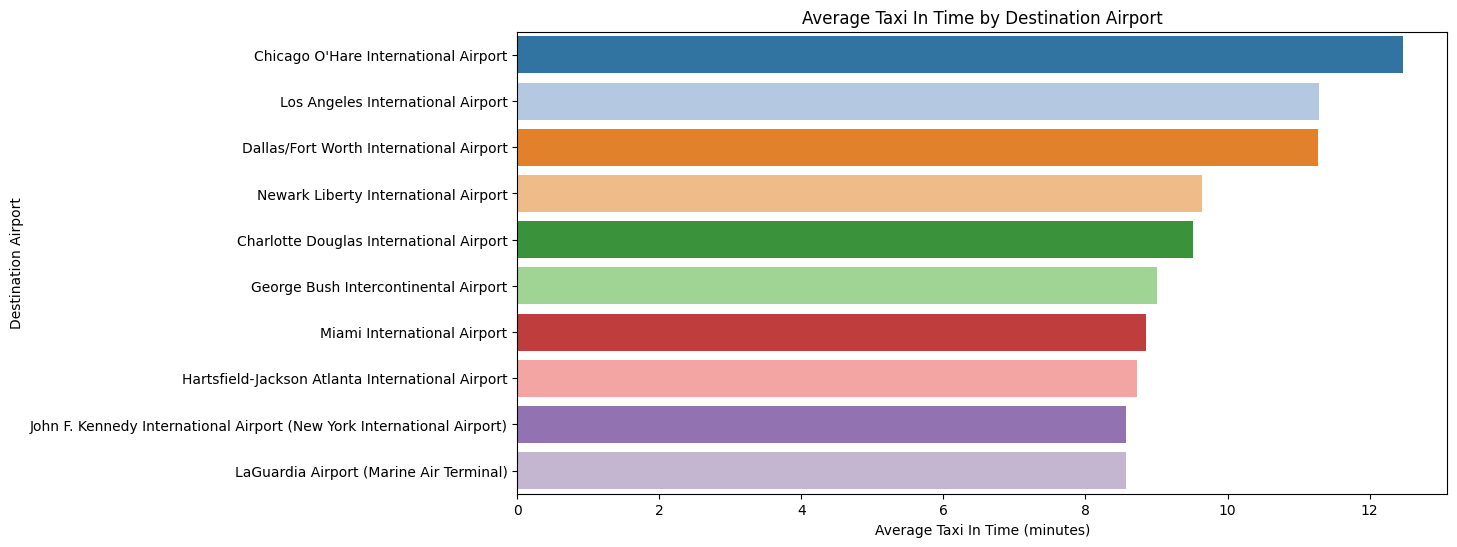

In [84]:
# grouping and aggregrating taxi in by destination airports
destination_airport_by_taxi_in = filtered_airports_data.groupby('DESTINATION_AIRPORT')['TAXI_IN'].mean().round(2).nlargest(10).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))
sns.barplot(data=destination_airport_by_taxi_in, x='TAXI_IN', y='DESTINATION_AIRPORT', orient='h', palette='tab20', hue='DESTINATION_AIRPORT')

#setting labels and title
plt.title('Average Taxi In Time by Destination Airport')
plt.xlabel('Average Taxi In Time (minutes)')
plt.ylabel('Destination Airport')
plt.show()

###### **H33**:Flights arriving very early in the morning (around 4:22 AM) experience significantly longer taxi-in times compared to flights arriving later in the day.

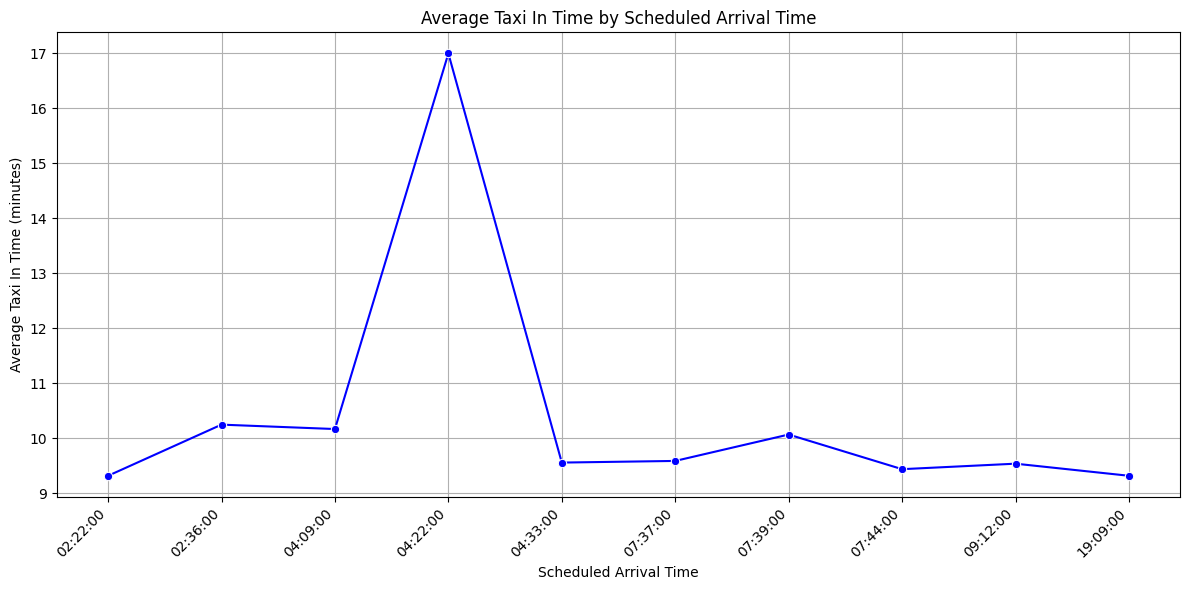

In [85]:
# top 10 scheduled arrival times with highest average taxi-in time
scheduled_arrival_by_taxi_in = (
    indigo_data.groupby('SCHEDULED_ARRIVAL')['TAXI_IN']
    .mean()
    .round(2)
    .nlargest(10)
    .reset_index()
)

# Sort those 10 rows by time for proper x-axis plotting
scheduled_arrival_by_taxi_in = scheduled_arrival_by_taxi_in.sort_values('SCHEDULED_ARRIVAL')

# Convert to string for better x-axis display
scheduled_arrival_by_taxi_in['SCHEDULED_ARRIVAL_STR'] = scheduled_arrival_by_taxi_in['SCHEDULED_ARRIVAL'].astype(str)

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

#plotting a line graph and it is best for visualizing for date time related columns
sns.lineplot(
    data=scheduled_arrival_by_taxi_in,
    x='SCHEDULED_ARRIVAL_STR',
    y='TAXI_IN',
    marker='o',
    color='blue'
)

plt.xticks(rotation=45, ha='right')

#setting the labels and title
plt.title('Average Taxi In Time by Scheduled Arrival Time')
plt.xlabel('Scheduled Arrival Time')
plt.ylabel('Average Taxi In Time (minutes)')
plt.tight_layout()
plt.grid()
plt.show()


###### **H34**: Spirit Airlines has a significantly higher average taxi-in time compared to other airlines.

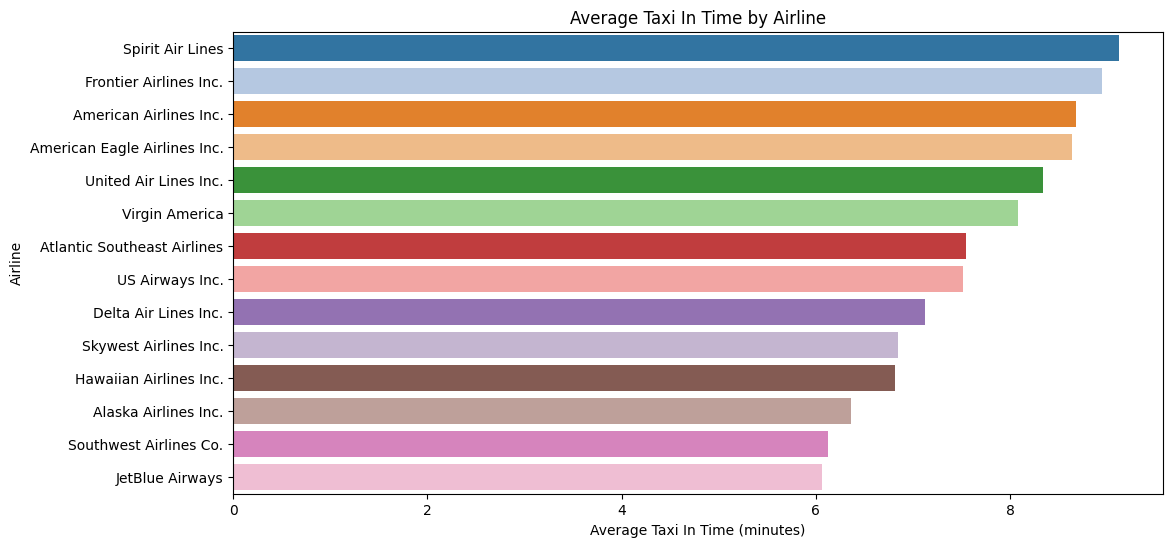

In [86]:
#grouping and aggregrating taxi in by airline
airline_by_taxi_in = indigo_data.groupby('AIRLINE')['TAXI_IN'].mean().sort_values(ascending=False).round(2).reset_index()
# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

sns.barplot(data=airline_by_taxi_in, x='TAXI_IN', y='AIRLINE', orient='h', palette='tab20', hue='AIRLINE')
#setting labels and title
plt.title('Average Taxi In Time by Airline')
plt.xlabel('Average Taxi In Time (minutes)')
plt.ylabel('Airline')
plt.show()

 ARRIVAL_DELAY

###### **H35**: Flights scheduled at 02:37 and 04:09 show significantly higher average arrival delays compared to other scheduled departure times.

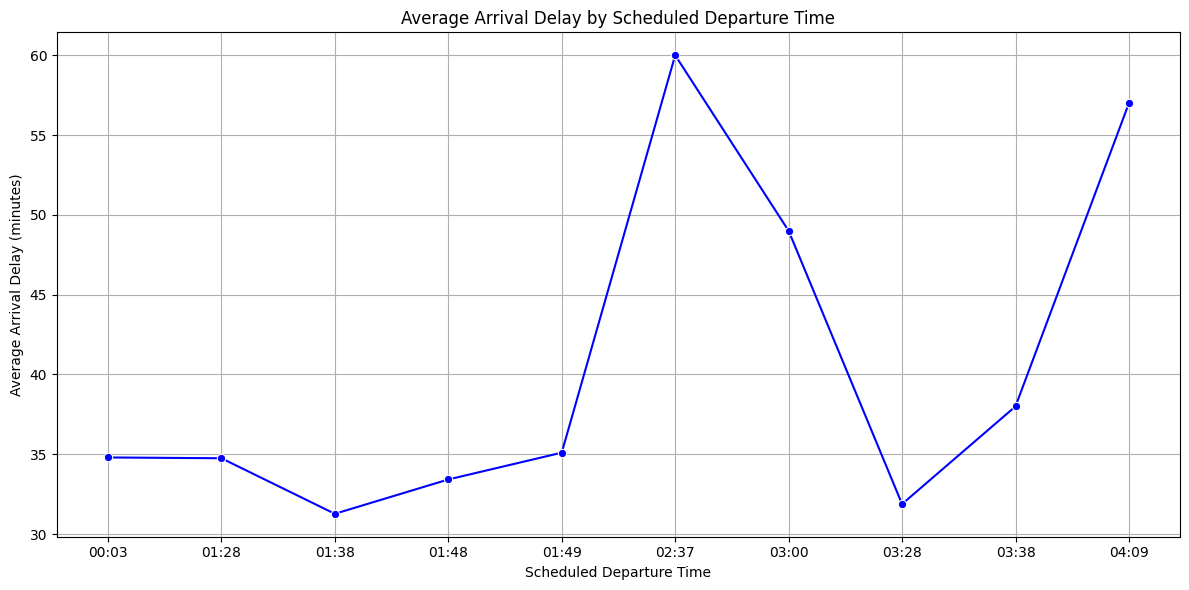

In [87]:
# grouping and agggregrating arrival delay by scheduled_departure
arrival_delay_by_schedule_depature = indigo_data.groupby(['SCHEDULED_DEPARTURE'])['ARRIVAL_DELAY'].mean().nlargest(10).round(2).sort_index().reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

sns.lineplot(data=arrival_delay_by_schedule_depature, x='SCHEDULED_DEPARTURE', y='ARRIVAL_DELAY', marker='o', color='blue')

#setting labels and title
plt.title('Average Arrival Delay by Scheduled Departure Time')
plt.xlabel('Scheduled Departure Time')
plt.ylabel('Average Arrival Delay (minutes)')
plt.tight_layout()
plt.grid()
plt.show()

###### **H36**:Flights arriving at St. Cloud Regional Airport and Wilmington Airport experience significantly higher average arrival delays compared to flights arriving at other listed destination airports.

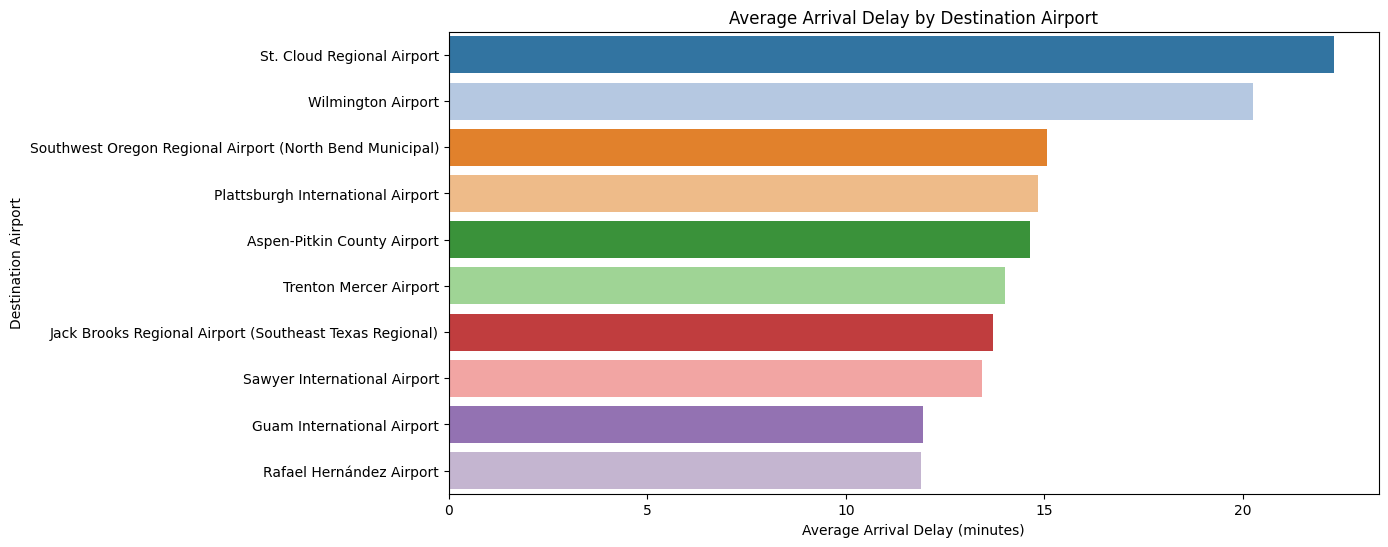

In [88]:
# grouping and agggregrating arrival delay by destination airport
arrival_delay_by_destination_airpot = filtered_airports_data.groupby(['DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean().nlargest(10).round(2).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

sns.barplot(data=arrival_delay_by_destination_airpot, x='ARRIVAL_DELAY', y='DESTINATION_AIRPORT', orient='h', palette='tab20', hue='DESTINATION_AIRPORT')

#setting labels and title
plt.title('Average Arrival Delay by Destination Airport')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Destination Airport')
plt.show()

###### **H37**: Flights from Raleigh-Durham International Airport to Indianapolis International Airport and from Richmond International Airport to Columbia Metropolitan Airport show the highest average arrival delays, both exceeding 160 minutes (over 2.5 hours), compared to other top origin-destination routes.

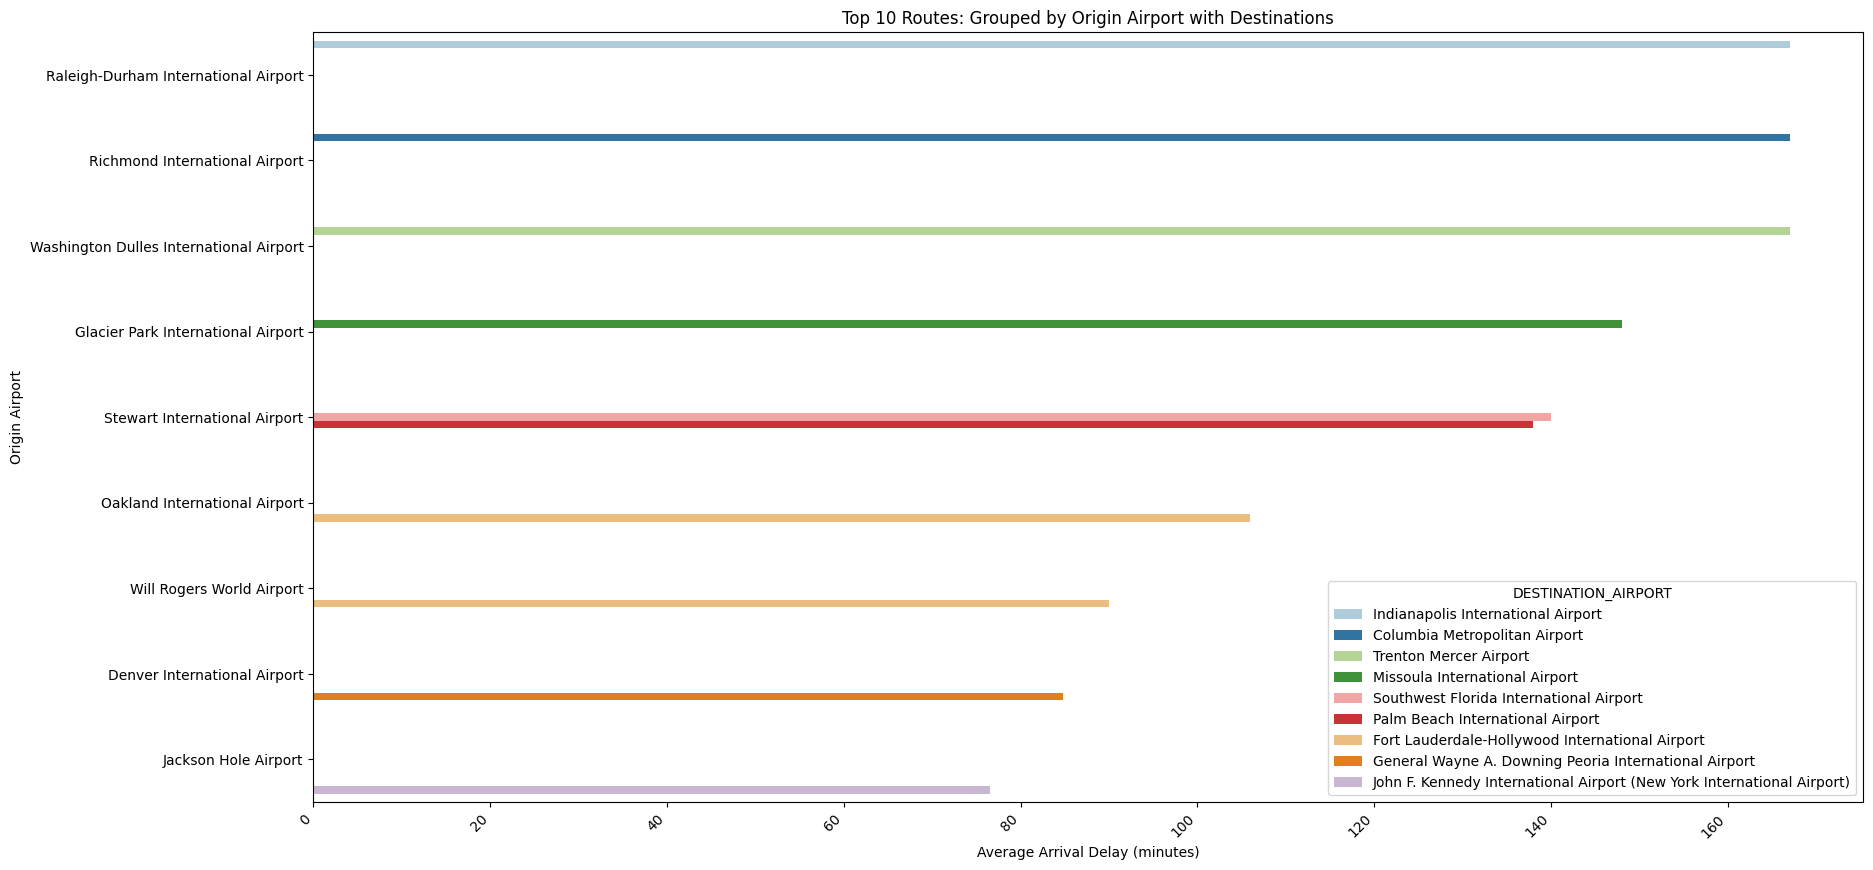

In [89]:
# Filter only non-numeric ORIGIN_AIRPORT values
# grouping and agggregrating arrival delay by destination airport
arrival_delay_by_airport = filtered_airports_data.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean().nlargest(10).round(2).reset_index()

# Plotting  figure of width of width 20 inches and height 10 inches to ensure proper spacing and readability
plt.figure(figsize=(20, 10))

sns.barplot(data=arrival_delay_by_airport,
            x='ARRIVAL_DELAY',
            y='ORIGIN_AIRPORT',
            hue='DESTINATION_AIRPORT',
            orient='h',
            palette='Paired')
#setting labels and title
plt.title('Top 10 Routes: Grouped by Origin Airport with Destinations')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better spacing
plt.ylabel('Origin Airport')
plt.xlabel('Average Arrival Delay (minutes)')
plt.show()

###### **H38**:Flights departing between 03:28 and 03:40 tend to have the highest average arrival delays, especially on Day 4 (Thursday)

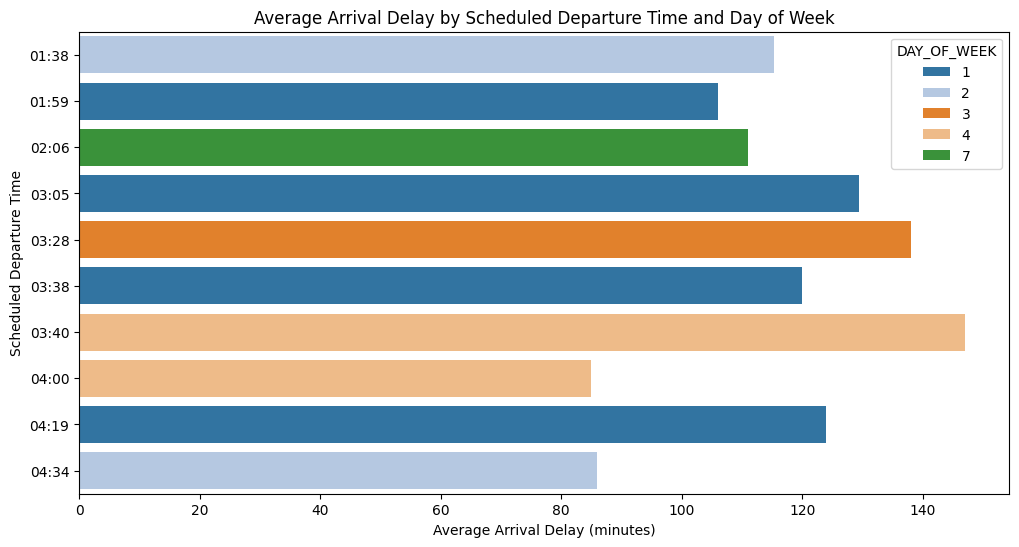

In [90]:
# grouping and agggregrating arrival delay by scheduled departure and day_of_week
arrival_delay_by_scheduled_depature_day_of_week  = indigo_data.groupby(['SCHEDULED_DEPARTURE','DAY_OF_WEEK'])['ARRIVAL_DELAY'].mean().nlargest(10).round(2).sort_values(ascending=False).sort_index().reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

sns.barplot(data=arrival_delay_by_scheduled_depature_day_of_week, x='ARRIVAL_DELAY', y='SCHEDULED_DEPARTURE', hue='DAY_OF_WEEK', palette='tab20')

#setting labels and title
plt.title('Average Arrival Delay by Scheduled Departure Time and Day of Week')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Scheduled Departure Time')
plt.show()


###### **H39**: Departure delay and air system delay significantly affect arrival delay, particularly in cases where both delays are high.

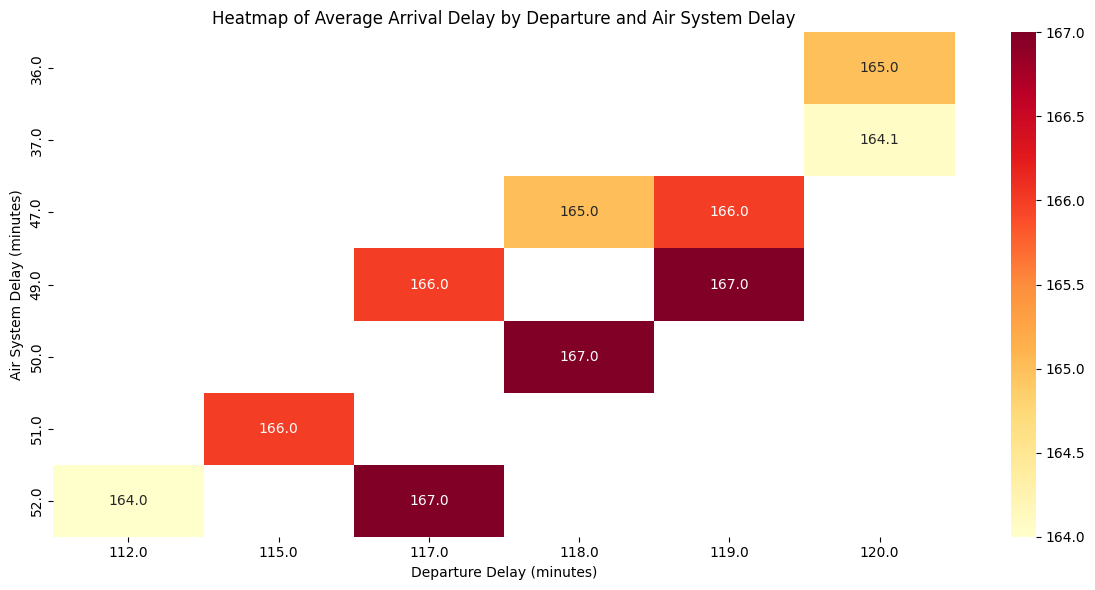

In [91]:
# grouping and agggregrating arrival delay by depature delay and air system delay
arrival_delay_by_depature_air_system = indigo_data.groupby(['DEPARTURE_DELAY','AIR_SYSTEM_DELAY'])['ARRIVAL_DELAY'].mean().nlargest(10).round(2).sort_values(ascending=False).sort_index().reset_index()
pivot_table = arrival_delay_by_depature_air_system.pivot(
    index='AIR_SYSTEM_DELAY', columns='DEPARTURE_DELAY', values='ARRIVAL_DELAY'
)
# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlOrRd")

#setting labels and title
plt.title('Heatmap of Average Arrival Delay by Departure and Air System Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Air System Delay (minutes)')
plt.tight_layout()
plt.show()


##### **4.Total Flight Duration**

###### **H40**:Flights scheduled around late morning (10:40 AM – 11:58 AM) tend to have slightly longer average elapsed times compared to flights scheduled earlier in the day.

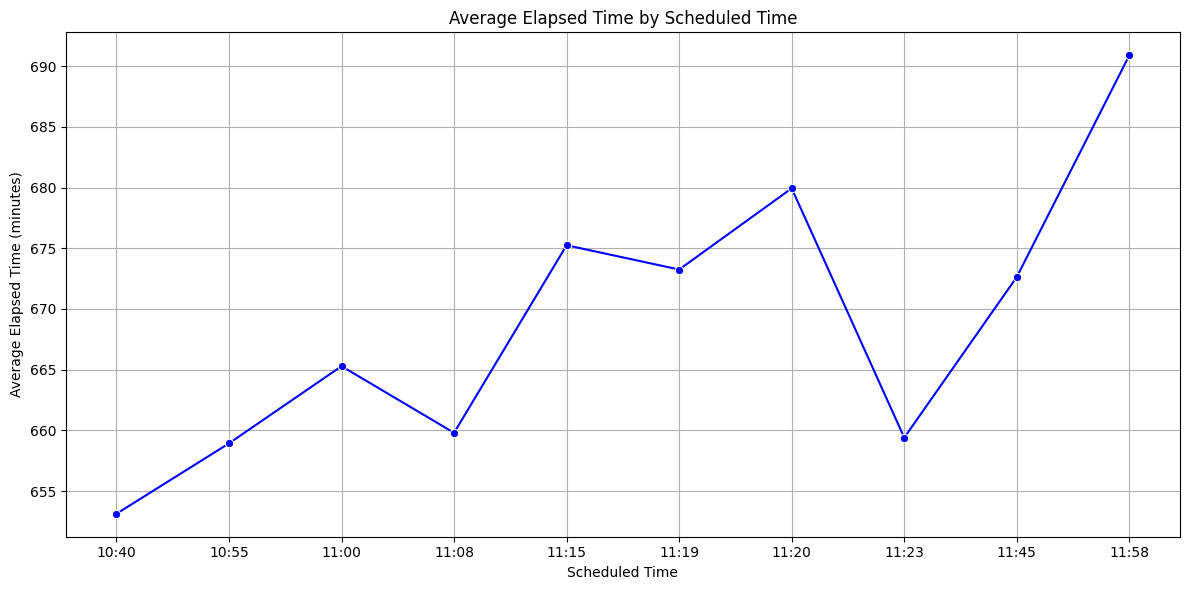

In [92]:
# grouping and agggregrating elapsed time by scheduled_time
schedule_time_by_elapsed_time = indigo_data.groupby('SCHEDULED_TIME')['ELAPSED_TIME'].mean().round(2).nlargest(10).sort_index().reset_index()


# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

#plotting a line graph as it is best for visualizing date time variables
sns.lineplot(
    data=schedule_time_by_elapsed_time,
    x='SCHEDULED_TIME',
    y='ELAPSED_TIME',
    marker='o',
    color='blue'
)

#setting the labels and title
plt.title('Average Elapsed Time by Scheduled Time')
plt.xlabel('Scheduled Time')
plt.ylabel('Average Elapsed Time (minutes)')
plt.tight_layout()
plt.grid()
plt.show()


###### **H41**:Flights with higher weather delays tend to have increased average elapsed times, especially when the delay exceeds a certain threshold (e.g., 120 minutes).

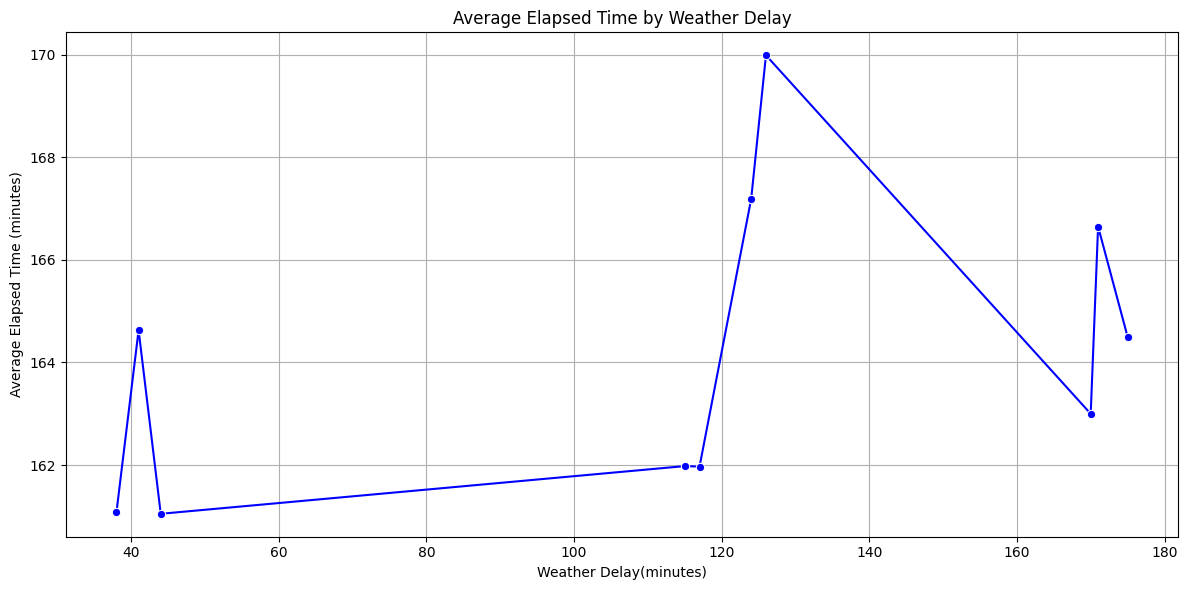

In [93]:
# grouping and agggregrating elapsed time by weather delay
weather_delay_by_elapsed_time = indigo_data.groupby('WEATHER_DELAY')['ELAPSED_TIME'].mean().round(2).nlargest(10).sort_index().reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))

#plotting a line graph as it is best for visualizing date time variables
sns.lineplot(
    data=weather_delay_by_elapsed_time,
    x='WEATHER_DELAY',
    y='ELAPSED_TIME',
    marker='o',
    color='blue'
)

#setting labels and title
plt.title('Average Elapsed Time by Weather Delay')
plt.xlabel('Weather Delay(minutes)')
plt.ylabel('Average Elapsed Time (minutes)')
plt.tight_layout()
plt.grid()
plt.show()

######**H42**: Guam International Airport consistently has the highest average air time across all days of the week among the top 10 origin airports.

Text(0, 0.5, 'Average Air Time (minutes)')

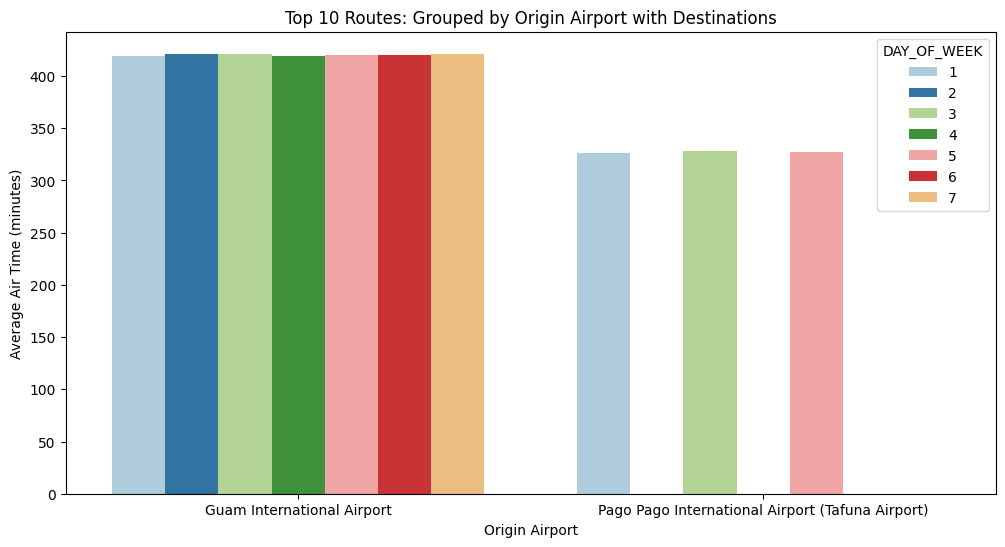

In [94]:
# grouping and agggregrating elapsed time by day of week
origin_airport_by_elapsed_time = filtered_airports_data.groupby(['ORIGIN_AIRPORT','DAY_OF_WEEK'])['ELAPSED_TIME'].mean().round(2).nlargest(10).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))
# Grouped bar plot: x = ORIGIN, hue = DESTINATION
sns.barplot(data=origin_airport_by_elapsed_time,
            x='ORIGIN_AIRPORT',
            y='ELAPSED_TIME',
            hue='DAY_OF_WEEK',
            palette='Paired')

# setting  labels and title
plt.title('Top 10 Routes: Grouped by Origin Airport with Destinations')
plt.xlabel('Origin Airport')
plt.ylabel('Average Air Time (minutes)')

######**H43**:Flights to Honolulu International Airport from origins like John F. Kennedy, Newark Liberty, Washington Dulles have longer average elapsed times (615-665 minutes).




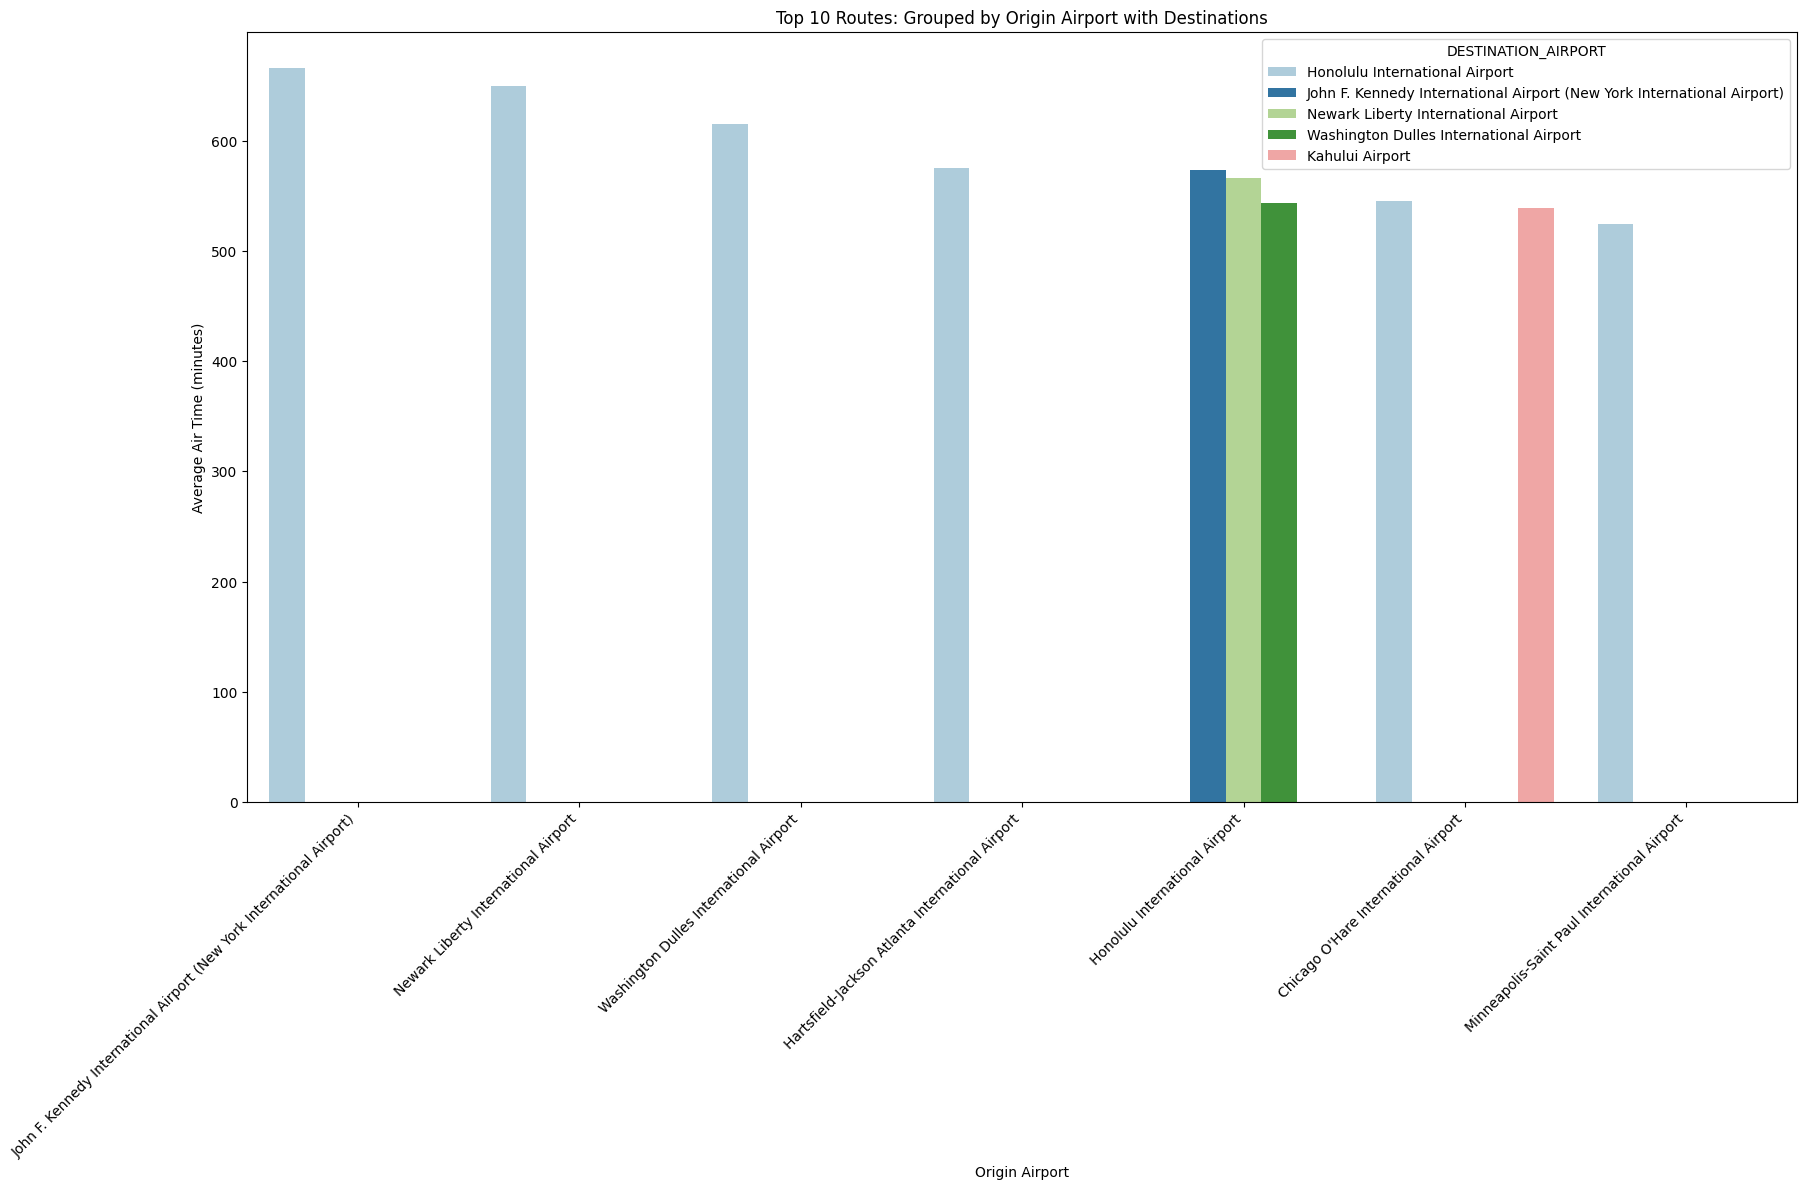

In [95]:
# grouping and agggregrating elapsed time by  origin airrport , destination airport
airport_by_elapsed_time = filtered_airports_data.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'])['ELAPSED_TIME'].mean().round(2).nlargest(10).reset_index()

# Plotting  figure of width of width 20 inches and height 10 inches to ensure proper spacing and readability
plt.figure(figsize=(20, 10))
# Grouped bar plot: x = ORIGIN, hue = DESTINATION
sns.barplot(data=airport_by_elapsed_time,
            x='ORIGIN_AIRPORT',
            y='ELAPSED_TIME',
            hue='DESTINATION_AIRPORT',
            palette='Paired')

# setting  labels and title
plt.title('Top 10 Routes: Grouped by Origin Airport with Destinations')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better spacing
plt.xlabel('Origin Airport')
plt.ylabel('Average Air Time (minutes)')
plt.show()

###### **H44**:Flights originating from Honolulu International Airport have the longest ELAPSED_TIME (640 mins) with a moderate WEATHER_DELAY (79 mins), while those from Philadelphia International Airport have a shorter ELAPSED_TIME (490 mins) but the highest WEATHER_DELAY (180 mins),

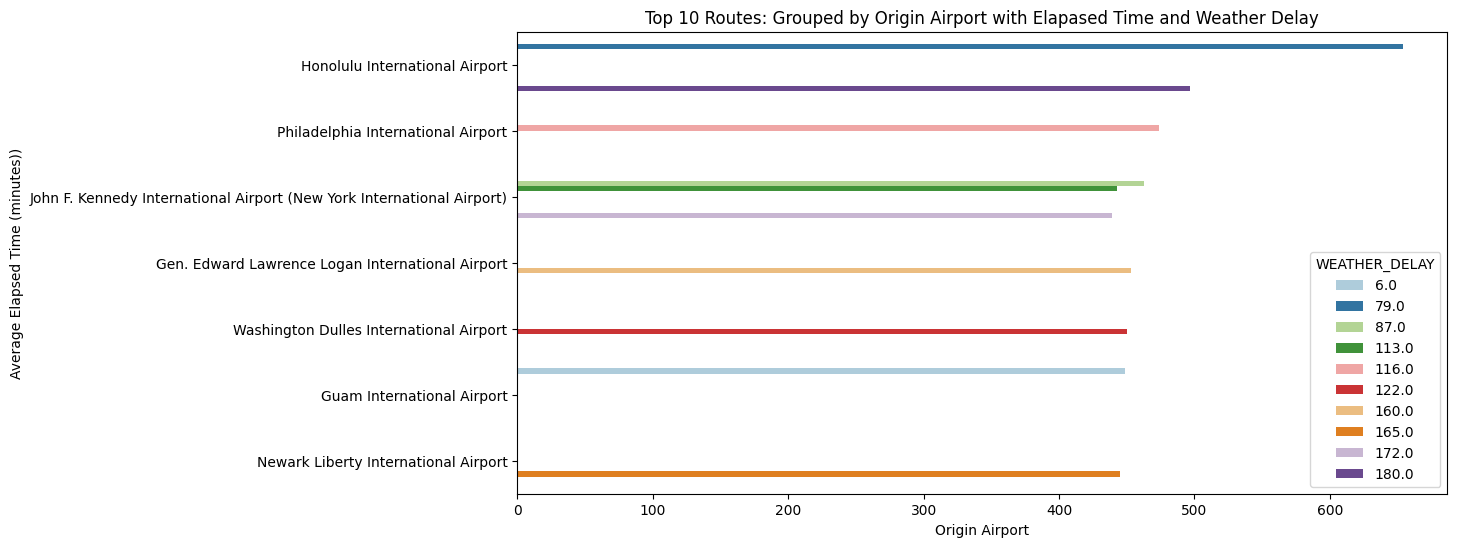

In [96]:
# grouping and agggregrating elapsed time by  origin airrport , weather delay
airport_by_elapsed_time = filtered_airports_data.groupby(['ORIGIN_AIRPORT','WEATHER_DELAY'])['ELAPSED_TIME'].mean().round(2).nlargest(10).reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))
# Grouped bar plot: x = ORIGIN_AIRPORT, Y=ELAPSED_TIME hue = WEATHER_DELAY(minutes)
sns.barplot(data=airport_by_elapsed_time,
            x='ELAPSED_TIME',
            y='ORIGIN_AIRPORT',
            hue='WEATHER_DELAY',
            orient='h',
            palette='Paired')

#setting labels and title
plt.title('Top 10 Routes: Grouped by Origin Airport with Elapased Time and Weather Delay')
plt.xlabel('Origin Airport')
plt.ylabel('Average Elapsed Time (minutes))')
plt.show()

###### **H45**:As flight distance increases, the average elapsed time also increases. Delta and Hawaiian Airlines generally take longer than other airlines.

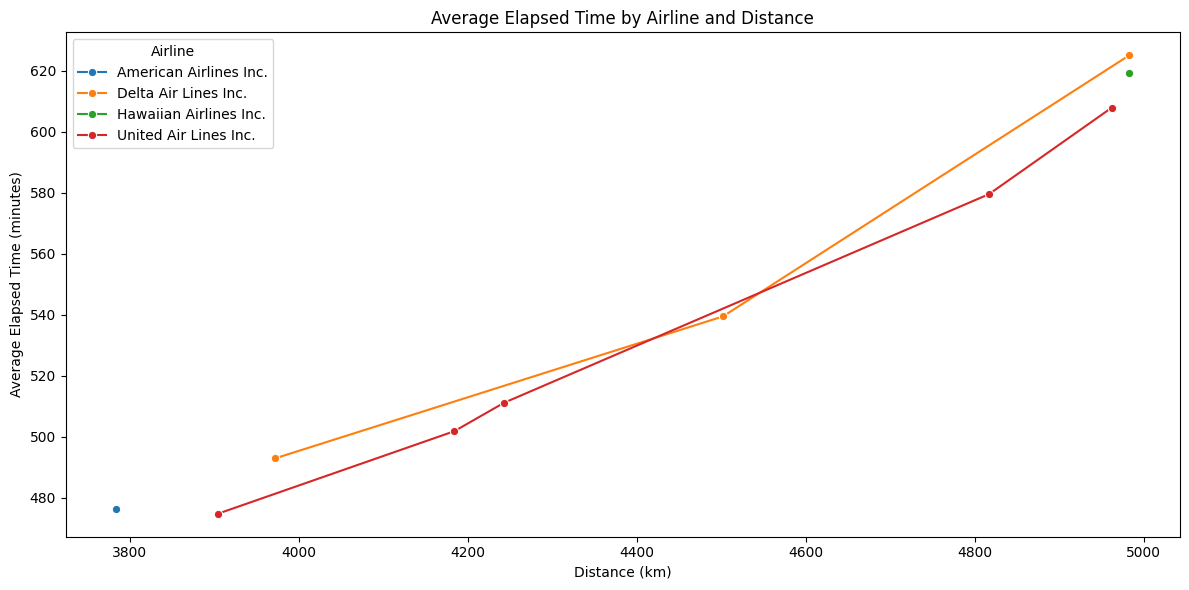

In [97]:
# grouping and agggregrating elapsed time by  airline and distance
elapsed_time_airline_distance = indigo_data.groupby(['AIRLINE','DISTANCE'])['ELAPSED_TIME'].mean().round(2).nlargest(10).sort_index().reset_index()

# Plotting  figure of width of width 12 inches and height 6 inches to ensure proper spacing and readability
plt.figure(figsize=(12, 6))
sns.lineplot(data=elapsed_time_airline_distance, x='DISTANCE', y='ELAPSED_TIME', hue='AIRLINE', palette='tab10',marker='o')

#setting labels and title
plt.title('Average Elapsed Time by Airline and Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Average Elapsed Time (minutes)')
plt.legend(title='Airline')
plt.tight_layout()
plt.show()

#####**Cancellation and Diversion Analysis**

###### **H46**:  Flight cancellations peak in February, with American Eagle Airlines Inc. (3.9k), Atlantic Southeast Airlines (3k), and Southwest Airlines Co. (2.9k) experiencing the highest cancellations.


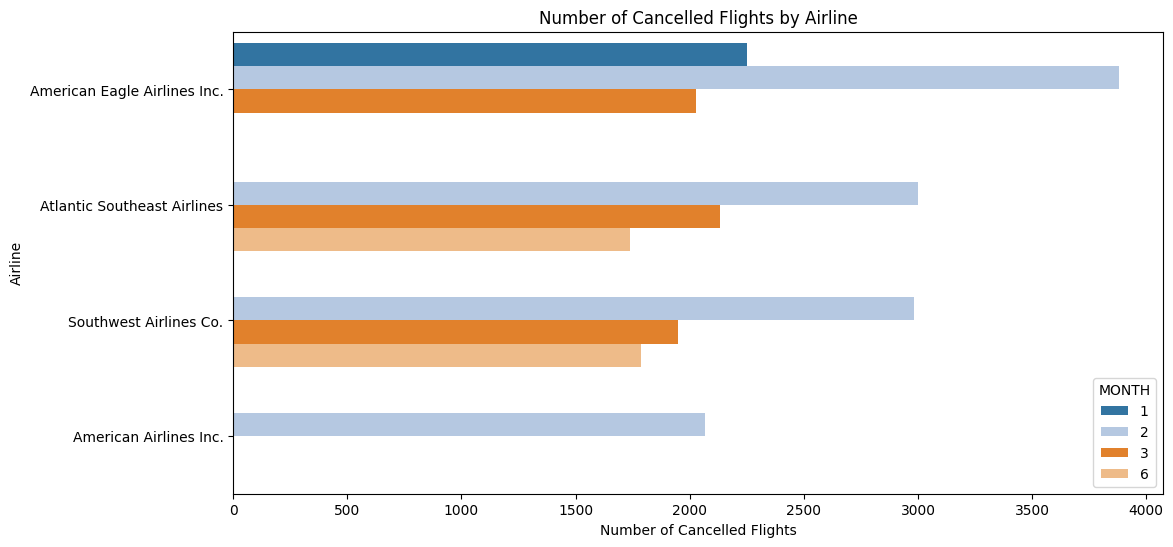

In [98]:
cancellation_data = indigo_data[indigo_data['CANCELLED'] == 1]

airline_cancellation_month = cancellation_data.groupby(['AIRLINE','MONTH'])['CANCELLED'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=airline_cancellation_month, x='CANCELLED', y='AIRLINE', orient='h', palette='tab20', hue='MONTH')
plt.title('Number of Cancelled Flights by Airline')
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Airline')
plt.show()

###### **H47**: Weather-related cancellations peak at Dallas/Fort Worth (~4.2k) and Chicago O'Hare (4k), while National Air System issues (2.2k) are more evenly distributed. Airline-related cancellations (1.4k) remain consistently lower across airports.

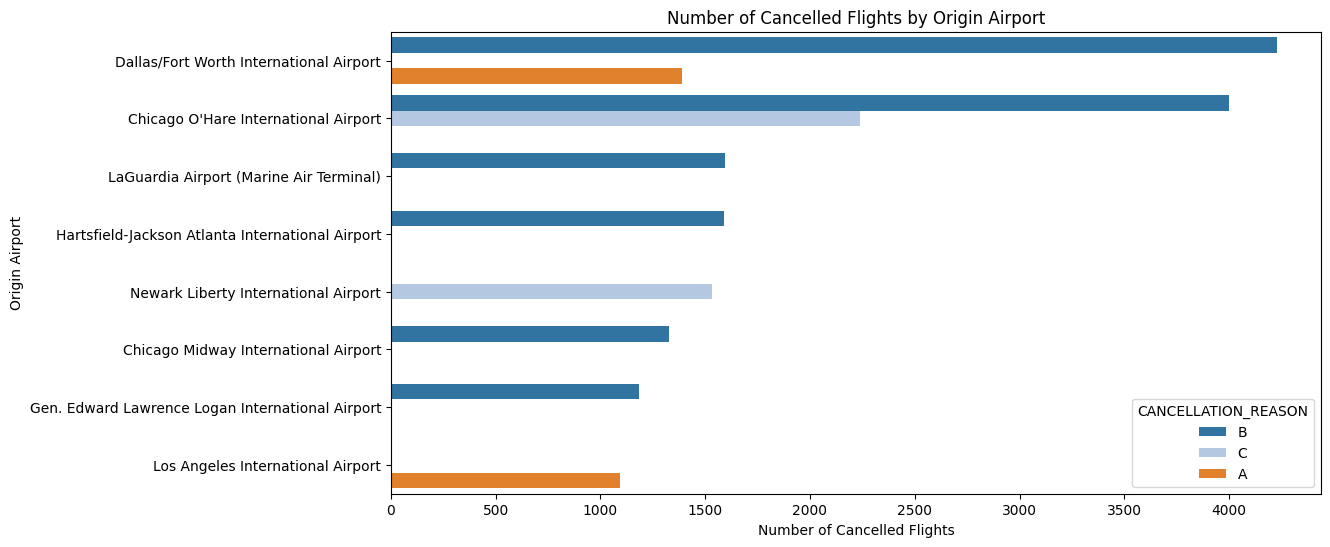

In [99]:
origin_airport_cancellation = cancellation_data.groupby(['ORIGIN_AIRPORT','CANCELLATION_REASON'])['CANCELLED'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=origin_airport_cancellation, x='CANCELLED', y='ORIGIN_AIRPORT', orient='h', palette='tab20', hue='CANCELLATION_REASON')
plt.title('Number of Cancelled Flights by Origin Airport')
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Origin Airport')
plt.show()


######**H48**: Most flight cancellations occur around 06:00, especially due to weather, while cancellations from both weather and airlines decrease steadily as the day progresses.

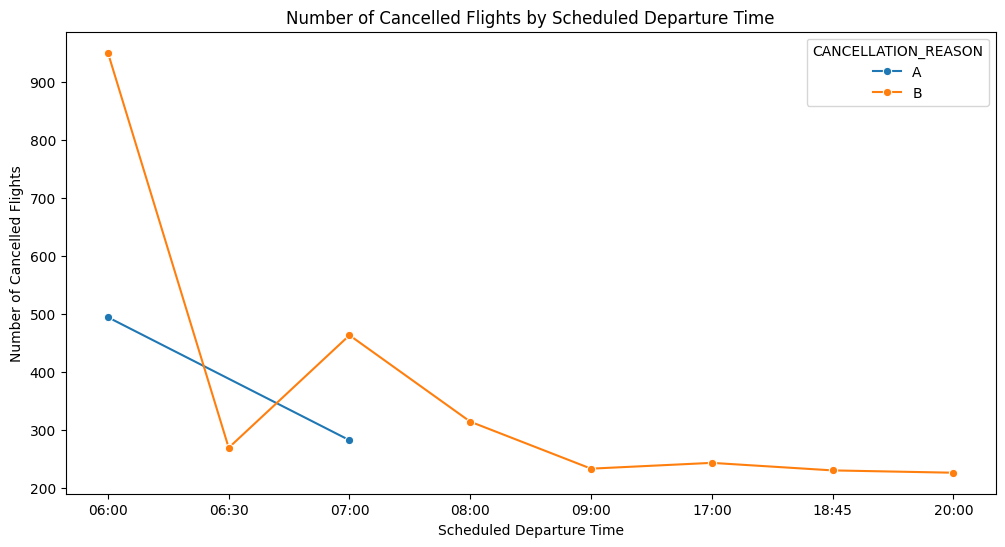

In [100]:
cancellation_reason_by_scheduled_depature = cancellation_data.groupby(['SCHEDULED_DEPARTURE','CANCELLATION_REASON'])['CANCELLED'].sum().nlargest(10).sort_index().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cancellation_reason_by_scheduled_depature, x='SCHEDULED_DEPARTURE', y='CANCELLED', hue='CANCELLATION_REASON', marker='o', palette='tab10')
plt.title('Number of Cancelled Flights by Scheduled Departure Time')
plt.xlabel('Scheduled Departure Time')
plt.ylabel('Number of Cancelled Flights')
plt.show()

###### **H49**: Airline/Carrier cancellations peak at mid-range distances (around 337 miles), weather-related cancellations are spread across all distances, and National Air System issues are minimal and localized.

Text(0.5, 0, 'Number of Cancelled Flights')

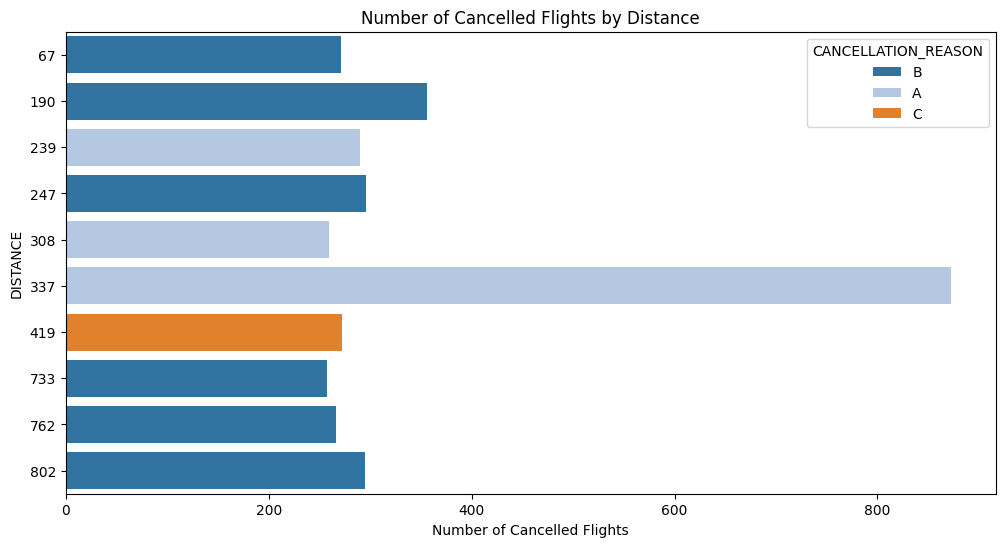

In [101]:
cancellation_reason_by_distance = cancellation_data.groupby(['DISTANCE','CANCELLATION_REASON'])['CANCELLED'].sum().nlargest(10).sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=cancellation_reason_by_distance, x='CANCELLED', y='DISTANCE', orient='h', palette='tab20', hue='CANCELLATION_REASON')
plt.title('Number of Cancelled Flights by Distance')
plt.xlabel('Number of Cancelled Flights')


######**H50**: Dallas/Fort Worth International Airport recorded the highest number of diverted flights during April and May, while Hartsfield-Jackson Atlanta International Airport saw high diversion counts during May, June, July, and August.

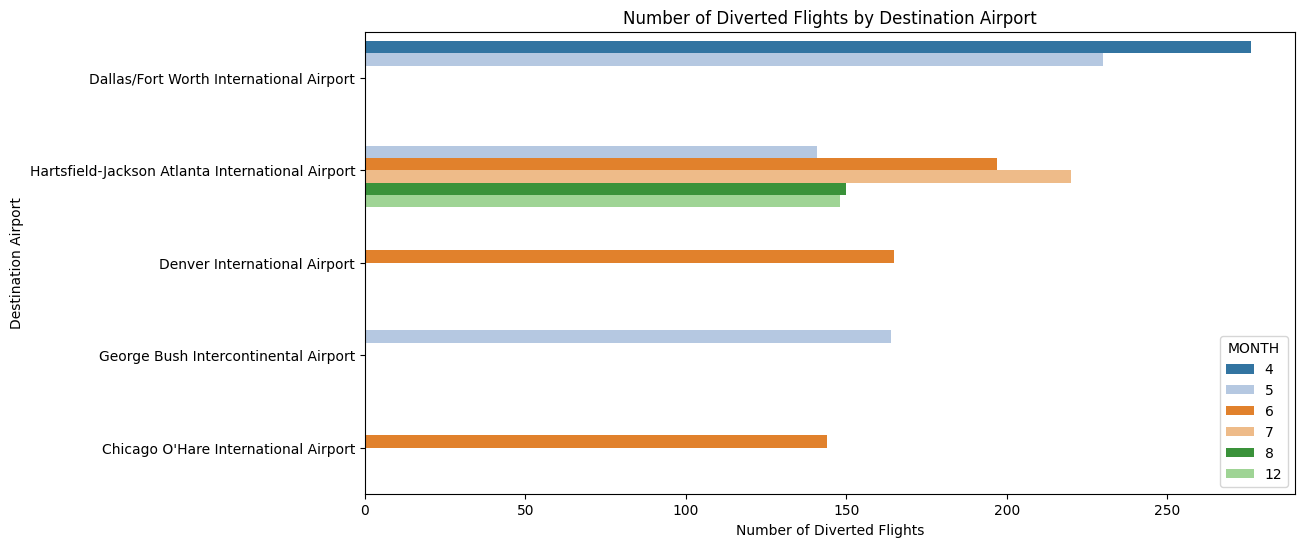

In [102]:
diverted_data = indigo_data[indigo_data['DIVERTED'] == 1]

diveret_by_destination_airport = diverted_data.groupby(['DESTINATION_AIRPORT','MONTH'])['DIVERTED'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=diveret_by_destination_airport, x='DIVERTED', y='DESTINATION_AIRPORT', orient='h', palette='tab20', hue='MONTH')
plt.title('Number of Diverted Flights by Destination Airport')
plt.xlabel('Number of Diverted Flights')
plt.ylabel('Destination Airport')
plt.show()


######**H51**:Southwest Airlines Co. and Skywest Airlines Inc. recorded the highest number of diverted flights, with most diversions occurring around scheduled departures at 06:00, 11:15, and 16:45.

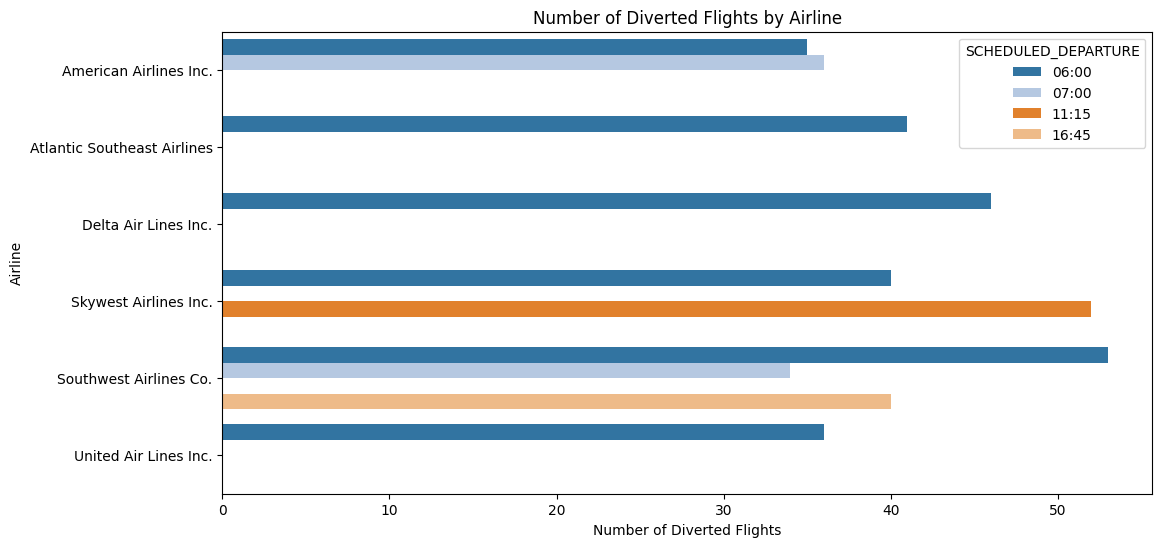

In [103]:
diversion_by_airline_scheduled_depature = diverted_data.groupby(['AIRLINE','SCHEDULED_DEPARTURE'])['DIVERTED'].sum().nlargest(10).sort_index().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=diversion_by_airline_scheduled_depature, x='DIVERTED', y='AIRLINE', orient='h', palette='tab20', hue='SCHEDULED_DEPARTURE')
plt.title('Number of Diverted Flights by Airline')
plt.xlabel('Number of Diverted Flights')
plt.ylabel('Airline')
plt.show()

In [104]:
# from google.colab import files

# # Saves the file locally in Colab
# indigo_data.to_csv('final_indigo_data.csv', index=False)

# # # Download the file to your laptop
# files.download('final_indigo_data.csv')


#**Key Findings from EDA & Impacts on OATR**

## Key Findings from Exploratory Data Analysis

## Departure Segment

**Airport-Specific Delays**  
- Wilmington, Martha’s Vineyard, and Barnstable show midweek delay peaks.  
- Newark to Minneapolis and Pago Pago on Wednesdays face extreme airline delays.  
- JFK, LGA, and Bangor have high taxi-out times, especially in summer and February.  
- St. Cloud Regional and Wilmington top total delays; Gustavus and Southwest Oregon see high arrival delays.

**Time and Day Patterns**  
- Late-night (00:00–05:30 AM) and afternoon (2 PM) flights show highest delays.  
- Mondays, Saturdays, and Sundays worsen early-morning taxi-out times.  
- Thursdays and Fridays peak taxi-out delays at JFK/LGA.

**Aircraft and Airline Insights**  
- Tail numbers N121UA, N843MH, and N79011 consistently report high delays.  
- Spirit Airlines leads in departure delays; Hawaiian Airlines the lowest.  
- Flight 6839 and Atlantic Southeast/Frontier show high airline delays.

**Seasonal and Security Factors**  
- Summer and February spike taxi-out times; March, July, December raise airline delays.  
- Security delays are highest at Adak Airport, moderate at Gustavus.

## In-Flight Segment

**Weather Delays Drive OTAR Drops**  
- Specific routes (e.g., Washington Dulles–Trenton Mercer) and times (late-night, 04:50 AM) face heavy weather delays, impacting departure and en-route times.

**Timing Matters**  
- Late-night, early-morning, and February flights show higher delay risks.  
- Air times peak around midnight–2 AM on Wednesdays/Fridays.

**Route Challenges**  
- Long air times from airports like Guam, Pago Pago, and JFK–Honolulu highlight network stress points.

## Arrival Segment

**Route-Specific Delays Hurt OTAR**  
- Routes like Raleigh-Durham–Indianapolis face extreme arrival delays (>160 min), needing targeted fixes.

**Timing Inefficiencies**  
- Departures between 03:28–03:40 AM (especially Thursdays) and early 4:22 AM arrivals show high delays.

**Systemic Delays Cascade**  
- Early issues (departure, air traffic delays) trigger network-wide arrival delays.

**Hub Bottlenecks**  
- High taxi-in times at hubs like Chicago O’Hare disrupt turnaround and OTAR.


## Impacts on On-Time Arrival Rate (OTAR)

## Departure Segment

- **Departure Delays:** Major cause for arrival disruptions; midweek and overnight schedules need adjustment.  
- **Taxi-Out Congestion:** High taxi-out times at JFK, LGA, Bangor erode on-time performance; improving ground ops is key.  
- **Aircraft Issues:** Unreliable aircraft (e.g., N843MH) drag down OTAR predictability.  
- **Vulnerable Routes/Times:** Newark–Minneapolis route and early-morning flights severely impact OTAR.  
- **Customer Trust:** High total delays at St. Cloud, Wilmington, and seasonal peaks hurt passenger satisfaction and OTAR scores.

## In-Flight Segment

- **Reduce Weather Delays:** Focus on high-delay routes/times to cut >175 min delays (e.g., Dulles–Trenton Mercer in February).  
- **Schedule Smarter:** Avoid peak delay windows (late-night winter, early AM) and long air-time slots.  
- **Gain Edge:** Proactive delay management can boost IndiGo’s reliability in the U.S. market.

## Arrival Segment

- **Fix Extreme Routes:** Target Raleigh-Durham–Indianapolis to cut >160 min delays.  
- **Adjust Schedules:** Avoid peak delay windows (03:28–03:40 AM Thursdays).  
- **Tackle Early Delays:** Improve departure and air system coordination.  
- **Boost Hub Efficiency:** Streamline taxi-in at O’Hare for better network flow.

## Total Flight Duration

- **Weather Delay Mitigation:** Improve forecasting, contingency planning, and rerouting to minimize major weather-related delays.  
- **Route Optimization:** Assign faster aircraft and add schedule buffers for long or delay-prone routes to enhance punctuality.  
- **Schedule Adjustment:** Shift departures away from late morning peaks to reduce congestion and improve on-time arrivals.  
- **Resource Planning:** Increase staffing and ground operations support during high-delay periods to speed up turnaround times.  
- **Passenger Communication:** Proactively inform customers about potential delays to manage expectations and maintain satisfaction.  
- **Ground Efficiency at Hubs:** Streamline taxi-in and turnaround processes at major hubs to avoid cascading delays across the network.
